## Assign Label

Apply labelling strategy.

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
# Functions shared across multiple notebooks are stored in yahoo_data_ext_kit.py which can be found in the same
# directory as the notebooks.

import yahoo_data_ext_kit as ext

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.options.display.float_format = '{:.0f}'.format

In [5]:
DATA_ROOT_DIR='/mnt/data/projects/MD3'
PROJ_ROOT_DIR='/home/priyesh/projects/MD3'

In [6]:
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_income_sheets_final_stage6.pkl')
income_sheets = pd.read_pickle(filepath)
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_cash_sheets_final_stage6.pkl')
cash_sheets = pd.read_pickle(filepath)
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_balance_sheets_final_stage6.pkl')
balance_sheets = pd.read_pickle(filepath)

In [7]:
income_sheets = income_sheets.fillna(0)
cash_sheets = cash_sheets.fillna(0)
balance_sheets = balance_sheets.fillna(0)

In [8]:
income_sheets.head()

company     yahoo_sector  gics_sector                industry  \
3831       A       Healthcare  Health Care  Diagnostics & Research   
3832       A       Healthcare  Health Care  Diagnostics & Research   
3833       A       Healthcare  Health Care  Diagnostics & Research   
3834       A       Healthcare  Health Care  Diagnostics & Research   
945       AA  Basic Materials    Materials                Aluminum   

         st_date st_YR st_Mnth  totalRevenue  costOfRevenue  grossProfit  \
3831  2019-10-31  2019      10    5163000000     2358000000   2805000000   
3832  2020-10-31  2020      10    5339000000     2502000000   2837000000   
3833  2021-10-31  2021      10    6319000000     2912000000   3407000000   
3834  2022-10-31  2022      10    6848000000     3126000000   3722000000   
945   2019-12-31  2019      12   10433000000     8537000000   1896000000   

       netIncome  operatingIncome  netIncomeContinuousOperations  \
3831  1071000000        941000000                     1071000000   
3832   719000000        846000000                      719000000   
3833  1210000000       1347000000                     1210000000   
3834  1254000000       1618000000                     1254000000   
945  -1125000000        876000000                     -853000000   

      netInterestIncome  interestIncome  otherIncomeExpense  operatingExpense  \
3831          -38000000        36000000            16000000        1864000000   
3832          -70000000         8000000            66000000        1991000000   
3833          -79000000         2000000            92000000        2060000000   
3834          -75000000         9000000           -39000000        2104000000   
945          -121000000               0         -1193000000        1020000000   

      totalExpenses  taxProvision  interestExpense        SGA  \
3831     4222000000    -152000000         74000000 1460000000   
3832     4493000000     123000000         78000000 1496000000   
3833     4972000000     150000000         81000000 1619000000   
3834     5230000000     250000000         84000000 1637000000   
945      9557000000     415000000        121000000  280000000   

      researchAndDevelopment       ebit  dilutedEPS  basicEPS  
3831               404000000  993000000           3         3  
3832               495000000  920000000           2         2  
3833               441000000 1441000000           4         4  
3834               467000000 1588000000           4         4  
945                 27000000 -317000000          -6        -6

In [9]:
def transpose_table(df):
  '''
  Transpose table setting columns to year
  '''
  ticker = df['company'].unique()

  print('Company: ',ticker)
  cols=list(df['st_YR'])
  df_temp = df.T
  df_temp.columns = cols
    
  return df_temp

## Balance Sheets

In [10]:
# Calculate Totals

balance_sheets['totalDebt'] = balance_sheets['currentDebt'] + balance_sheets['longTermDebt']
balance_sheets['totalAssets'] = balance_sheets['currentAssets'] + balance_sheets['totalNonCurrentAssets']
balance_sheets['totalLiabilities'] = balance_sheets['currentLiabilities'] + balance_sheets['totalNonCurrentLiabilities']
balance_sheets['workingCapital'] = balance_sheets['currentAssets'] - balance_sheets['currentLiabilities']

In [11]:
# Calculate Ratios 

balance_sheets['quickRatio'] = (balance_sheets['currentAssets'] - balance_sheets['inventory']) / balance_sheets['currentLiabilities']
balance_sheets['currentRatio'] = balance_sheets['currentAssets'] / balance_sheets['currentLiabilities']
balance_sheets['debtCapitalRatio'] = 100 * balance_sheets['totalDebt'] / (balance_sheets['totalDebt'] + balance_sheets['stockholdersEquity'])
balance_sheets['debtAssetRatio'] = 100 * balance_sheets['totalDebt'] / balance_sheets['totalAssets']


In [12]:
list(balance_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'cashEquivalent',
 'receivables',
 'finishedGoods',
 'workInProcess',
 'rawMaterials',
 'otherCurrentAssets',
 'inventory',
 'currentAssets',
 'netPPE',
 'otherNonCurrentAssets',
 'financialAssets',
 'goodwill',
 'goodwillAndOtherIntangibleAssets',
 'otherIntangibleAssets',
 'nonCurrentAccountsReceivable',
 'totalNonCurrentAssets',
 'currentDebt',
 'payablesAndAccruedExpenses',
 'otherCurrentLiabilities',
 'currentLiabilities',
 'longTermDebt',
 'otherNonCurrentLiabilities',
 'nonCurrentDeferredLiabilities',
 'nonCurrentDeferredTaxesLiabilities',
 'longTermProvisions',
 'totalNonCurrentLiabilities',
 'retainedEarnings',
 'stockholdersEquity',
 'totalDebt',
 'totalAssets',
 'totalLiabilities',
 'workingCapital',
 'quickRatio',
 'currentRatio',
 'debtCapitalRatio',
 'debtAssetRatio']

In [13]:
pd.options.display.float_format = '{:.2f}'.format

# Generate a dataframe with median values for each company

cols=['cashEquivalent',
      'receivables',
      'finishedGoods',
      'workInProcess',
      'rawMaterials',
      'otherCurrentAssets',
      'inventory',
      'currentAssets',
      'netPPE',
      'otherNonCurrentAssets',
      'financialAssets',
      'goodwill',
      'goodwillAndOtherIntangibleAssets',
      'otherIntangibleAssets',
      'nonCurrentAccountsReceivable',
      'totalNonCurrentAssets',
      'currentDebt',
      'payablesAndAccruedExpenses',
      'otherCurrentLiabilities',
      'currentLiabilities',
      'longTermDebt',
      'otherNonCurrentLiabilities',
      'nonCurrentDeferredLiabilities',
      'nonCurrentDeferredTaxesLiabilities',
      'longTermProvisions',
      'totalNonCurrentLiabilities',
      'retainedEarnings',
      'stockholdersEquity',
      'totalDebt',
      'totalAssets',
      'totalLiabilities',
      'workingCapital',
      'quickRatio',
      'currentRatio',
      'debtCapitalRatio',
      'debtAssetRatio']

df_company_bal_median = balance_sheets.groupby(['company','industry'])[cols].median().round(2).reset_index()
df_company_bal_median

company                                industry  cashEquivalent  \
0         A                  Diagnostics & Research   1411500000.00   
1        AA                                Aluminum   1485000000.00   
2       AAL                                Airlines   7914500000.00   
3       AAP                        Specialty Retail    510046500.00   
4      AAPL                    Consumer Electronics  76791000000.00   
5      ABBV              Drug Manufacturers—General   9529500000.00   
6       ABC                    Medical Distribution   3381191500.00   
7      ABNB                         Travel Services   7356866500.00   
8       ABT                         Medical Devices   8659000000.00   
9      ACHC                 Medical Care Facilities    129002500.00   
10      ACI                          Grocery Stores   1093850000.00   
11      ACM              Engineering & Construction   1200702500.00   
12      ACN         Information Technology Services   8033137000.00   
13     ADBE                 Software—Infrastructure   5895000000.00   
14      ADI                          Semiconductors   1263216000.00   
15      ADM                           Farm Products    897500000.00   
16      ADP          Staffing & Employment Services   1928850000.00   
17     ADSK                    Software—Application   1850450000.00   
18      ADT          Security & Protection Services    127000000.00   
19      AEE            Utilities—Regulated Electric     77500000.00   
20      AEP            Utilities—Regulated Electric    608650000.00   
21      AES                   Utilities—Diversified   1426500000.00   
22     AFRM                 Software—Infrastructure    893503000.00   
23     AGCO     Farm & Heavy Construction Machinery    839300000.00   
24      AGR            Utilities—Regulated Electric    826000000.00   
25     AKAM                 Software—Infrastructure   1101694500.00   
26       AL               Rental & Leasing Services    926459000.00   
27      ALB                     Specialty Chemicals    679917000.00   
28     ALGN                         Medical Devices    980213500.00   
29      ALK                                Airlines   2766500000.00   
30     ALLE          Security & Protection Services    376600000.00   
31     ALNY                           Biotechnology   2033400500.00   
32   ALNY_S                           Biotechnology       100000.00   
33     ALSN                              Auto Parts    212000000.00   
34       AM                     Oil & Gas Midstream       320000.00   
35     AMAT     Semiconductor Equipment & Materials   4538500000.00   
36      AMC                           Entertainment    469900000.00   
37     AMCR                  Packaging & Containers    759000000.00   
38      AMD                          Semiconductors   2949000000.00   
39      AME          Specialty Industrial Machinery    369901000.00   
40     AMED                 Medical Care Facilities     41617000.00   
41     AMGN              Drug Manufacturers—General   9108000000.00   
42     AMZN                         Internet Retail  77211000000.00   
43       AN                Auto & Truck Dealerships     66500000.00   
44     ANET                       Computer Hardware   2948298500.00   
45     ANSS                    Software—Application    770205000.00   
46      AOS          Specialty Industrial Machinery    591400000.00   
47      APA                           Oil & Gas E&P    254500000.00   
48      APD                     Specialty Chemicals   4551250000.00   
49      APH                   Electronic Components   1337800000.00   
50      APP                    Software—Application    738365500.00   
51     APTV                              Auto Parts   2176000000.00   
52     ARMK             Specialty Business Services    431021500.00   
53      ARW     Electronics & Computer Distribution    261148500.00   
54      ASH                     Specialty Chemicals    343000000.00   
55      ATO                 

In [14]:
mask=df_company_bal_median['currentRatio'] < 0.80
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['currentRatio'])

company                         industry  quickRatio  currentRatio  \
336  JBLU_S                         Airlines       -0.16          0.08   
384  LYFT_S             Software—Application        0.12          0.12   
76     BA_S              Aerospace & Defense       -8.89          0.13   
381   LVS_S                Resorts & Casinos        0.08          0.17   
479   OSH_S          Medical Care Facilities        0.17          0.17   
32   ALNY_S                    Biotechnology       -0.71          0.22   
455  NVAX_S                    Biotechnology        0.23          0.23   
526  PTON_S                          Leisure       -5.90          0.23   
223  EXAS_S           Diagnostics & Research       -2.06          0.26   
247  FRPT_S                   Packaged Foods       -5.61          0.27   
191     DTM              Oil & Gas Midstream        0.29          0.29   
575    SIRI                    Entertainment        0.33          0.33   
123    CHTR                 Telecom Services        0.36          0.36   
572  SGEN_S                    Biotechnology       -3.06          0.36   
343     KDP          Beverages—Non-Alcoholic        0.28          0.41   
540     RCL                  Travel Services        0.41          0.43   
36      AMC                    Entertainment        0.42          0.44   
20      AEP     Utilities—Regulated Electric        0.34          0.45   
492    PDCE                    Oil & Gas E&P        0.46          0.46   
57     ATUS                 Telecom Services        0.48          0.48   
389     MAR                          Lodging        0.48          0.48   
701  WOLF_S                   Semiconductors       -4.51          0.49   
423    MSGS                    Entertainment        0.49          0.49   
556     RRC                    Oil & Gas E&P        0.49          0.49   
672    VRSK              Consulting Services        0.49          0.49   
437     NEE     Utilities—Regulated Electric        0.44          0.52   
594     SRE            Utilities—Diversified        0.48          0.52   
370     LNT     Utilities—Regulated Electric        0.40          0.52   
568     SCI                Personal Services        0.50          0.53   
443     NFG             Oil & Gas Integrated        0.41          0.55   
396     MCW                Personal Services        0.52          0.57   
604     SWN                    Oil & Gas E&P        0.57          0.57   
537  RARE_S                    Biotechnology       -0.36          0.58   
481     OVV                    Oil & Gas E&P        0.59          0.59   
220    EVRG     Utilities—Regulated Electric        0.40          0.59   
511  PLUG_S     Electrical Equipment & Parts       -5.28          0.60   
217     ETR     Utilities—Regulated Electric        0.41          0.61   
192     DUK     Utilities—Regulated Electric        0.41          0.62   
18      ADT   Security & Protection Services        0.46          0.62   
398    MDLZ                    Confectioners        0.44          0.63   
214      ES     Utilities—Regulated Electric        0.57          0.63   
445      NI          Utilities—Regulated Gas        0.46          0.63   
467     OGE     Utilities—Regulated Electric        0.43          0.63   
163     DAL                         Airlines        0.58          0.63   
433    NCLH                  Travel Services        0.60          0.63   
203     EIX     Utilities—Regulated Electric        0.58          0.64   
119    CHDN                         Gambling        0.64          0.64   
349     KMI              Oil & Gas Midstream        0.56          0.64   
64      AWK        Utilities—Regulated Water        0.63          0.64   
493     PEG     Utilities—Regulated Electric        0.50          0.65   
708    WTRG        Utilities—Regulated Water        0.51          0.65   
341       K                   Packaged Foods        0.40          0.66   
520     PPL     Utilities—Regulated Electric        0.56          0.66   
690     

In [15]:
mask=df_company_bal_median['industry'].isin(['Discount Stores','Apparel Retail','Department Stores'])
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['industry'])

company           industry  quickRatio  currentRatio  debtCapitalRatio  \
98     BURL     Apparel Retail        0.68          1.25             86.42   
621     TJX     Apparel Retail        0.67          1.25             67.13   
147     CRI     Apparel Retail        1.39          2.39             62.09   
554    ROST     Apparel Retail        1.27          1.73             57.58   
272     GPS     Apparel Retail        0.71          1.41             71.39   
677    VSCO     Apparel Retail        0.39          0.97             78.92   
377    LULU     Apparel Retail        1.42          2.26             24.85   
352     KSS  Department Stores        0.50          1.60             57.87   
340     JWN  Department Stores        0.40          0.94             87.58   
386       M  Department Stores        0.38          1.19             63.19   
618     TGT    Discount Stores        0.31          0.95             54.81   
87       BJ    Discount Stores        0.13          0.74             86.56   
183    DLTR    Discount Stores        0.26          1.35             56.66   
173      DG    Discount Stores        0.13          1.18             68.29   
141    COST    Discount Stores        0.52          1.02             33.33   
472    OLLI    Discount Stores        1.04          2.81             24.66   
699     WMT    Discount Stores        0.25          0.87             43.60   

     debtAssetRatio  
98            64.78  
621           46.22  
147           50.17  
554           41.88  
272           54.27  
677           54.73  
377           19.09  
352           44.51  
340           52.75  
386           38.37  
618           31.16  
87            55.94  
183           46.24  
173           53.33  
141           16.06  
472           21.72  
699           24.63

In [16]:

mask=df_company_bal_median['industry'].isin(['Internet Content & Information'])
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['industry'])

company                        industry  quickRatio  currentRatio  \
165    DASH  Internet Content & Information        2.60          2.60   
269    GOOG  Internet Content & Information        2.98          3.00   
305     IAC  Internet Content & Information        3.03          3.03   
400    META  Internet Content & Information        3.78          3.78   
426    MTCH  Internet Content & Information        1.81          1.81   
505    PINS  Internet Content & Information       11.62         11.62   
591    SPOT  Internet Content & Information        1.08          1.08   
646    TWLO  Internet Content & Information        7.93          7.93   
721       Z  Internet Content & Information        3.91          4.64   

     debtCapitalRatio  debtAssetRatio  
165              9.74            7.79  
269             10.26            8.01  
305             24.06           18.09  
400              9.63            8.05  
426            107.91           84.65  
505              7.58            7.05  
591             32.30           17.09  
646             10.39            9.79  
721             38.47           37.32

In [17]:
mask=df_company_bal_median['industry'].isin(['Home Improvement Retail','Restaurants'])
df_company_bal_median[mask] \
[['company','industry','quickRatio','currentRatio','debtCapitalRatio','debtAssetRatio']].sort_values(by=['industry'])

company                 industry  quickRatio  currentRatio  \
243     FND  Home Improvement Retail        0.24          1.36   
284      HD  Home Improvement Retail        0.31          1.15   
372     LOW  Home Improvement Retail        0.15          1.06   
131     CMG              Restaurants        1.56          1.59   
187     DPZ              Restaurants        1.48          1.60   
393     MCD              Restaurants        1.21          1.22   
566    SBUX              Restaurants        0.76          0.99   
691     WEN              Restaurants        1.61          1.62   
720     YUM              Restaurants        1.00          1.00   

     debtCapitalRatio  debtAssetRatio  
243             53.67           41.61  
284            100.40           65.13  
372            107.20           63.00  
131             61.08           53.39  
187            477.18          315.65  
393            116.00           97.17  
566            151.19           80.14  
691             88.81           74.98  
720            394.90          195.21

In [18]:
pd.options.display.float_format = '{:.2f}'.format

# Generate a dataframe with median values for ratios each industry

cols=['quickRatio',
      'currentRatio',
      'debtCapitalRatio',
      'debtAssetRatio']

df_industry_bal_median = df_company_bal_median.groupby('industry')[cols].median().round(2).reset_index()
df_industry_bal_median.sort_values(by='debtAssetRatio')

industry  quickRatio  currentRatio  \
72                               Publishing        1.67          1.67   
30            Education & Training Services        2.78          2.78   
51           Internet Content & Information        3.03          3.03   
90           Staffing & Employment Services        1.31          1.31   
96                                 Trucking        1.66          1.70   
4                                  Aluminum        0.95          1.60   
43                                     Gold        2.74          3.93   
64                     Oil & Gas Integrated        0.60          0.92   
60                     Medical Distribution        0.57          1.03   
33           Electronic Gaming & Multimedia        1.77          1.78   
45              Health Information Services        3.24          3.30   
34      Electronics & Computer Distribution        1.07          1.46   
102                     Utilities—Renewable        0.92          1.10   
10                        Beverages—Brewers        0.71          1.08   
40                   Footwear & Accessories        2.10          2.99   
13                            Biotechnology        3.23          3.79   
83                     Software—Application        1.36          1.36   
86              Specialty Business Services        2.20          2.32   
76                 Residential Construction        1.45          5.78   
9                                Auto Parts        1.29          1.72   
67         Other Industrial Metals & Mining       12.48         13.15   
82                           Semiconductors        1.66          2.25   
61           Medical Instruments & Supplies        1.62          2.25   
35               Engineering & Construction        1.36          1.40   
0                      Advertising Agencies        0.95          0.99   
57                          Marine Shipping        1.20          1.87   
66           Oil & Gas Refining & Marketing        1.09          1.73   
32                    Electronic Components        1.65          2.40   
79       Scientific & Technical Instruments        2.23          3.06   
50           Integrated Freight & Logistics        1.45          1.46   
88           Specialty Industrial Machinery        1.38          1.94   
17                  Communication Equipment        1.41          1.62   
18                        Computer Hardware        1.32          2.06   
62                            Oil & Gas E&P        1.00          1.16   
1                       Aerospace & Defense        1.14          1.92   
91                                    Steel        1.96          3.37   
63           Oil & Gas Equipment & Services        1.38          1.89   
59                          Medical Devices        2.32          3.17   
81      Semiconductor Equipment & Materials        2.51          3.26   
38                            Farm Products        0.82          1.68   
31             Electrical Equipment & Parts        1.19          1.81   
94                      Tools & Accessories        1.13          1.87   
8                        Auto Manufacturers        1.06          1.32   
20                            Conglomerates        1.11          1.62   
2                       Agricultural Inputs        1.06          1.63   
27                          Discount Stores        0.26          1.02   
14                       Building Materials        1.62          2.34   
23                                   Copper        2.08          2.83   
16                                Chemicals        1.16          1.69   
48                  Industrial Distribution        1.30          2.50   
11                  Beverages—Non-Alcoholic        0.81          0.99   
22                     Consumer Electronics        1.17          1.22   
68                           Packaged Foods        0.80          1.48   
73                                Railroads        0.72          0.88   
85                  

In [19]:
# Convert to a dictionaries for easy lookup

company_bal_median = df_company_bal_median.set_index('company').T.to_dict()
industry_bal_median = df_industry_bal_median.set_index('industry').T.to_dict()

## Income Sheets

In [20]:
list(income_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'totalRevenue',
 'costOfRevenue',
 'grossProfit',
 'netIncome',
 'operatingIncome',
 'netIncomeContinuousOperations',
 'netInterestIncome',
 'interestIncome',
 'otherIncomeExpense',
 'operatingExpense',
 'totalExpenses',
 'taxProvision',
 'interestExpense',
 'SGA',
 'researchAndDevelopment',
 'ebit',
 'dilutedEPS',
 'basicEPS']

In [21]:
income_sheets.head()

company     yahoo_sector  gics_sector                industry  \
3831       A       Healthcare  Health Care  Diagnostics & Research   
3832       A       Healthcare  Health Care  Diagnostics & Research   
3833       A       Healthcare  Health Care  Diagnostics & Research   
3834       A       Healthcare  Health Care  Diagnostics & Research   
945       AA  Basic Materials    Materials                Aluminum   

         st_date st_YR st_Mnth   totalRevenue  costOfRevenue   grossProfit  \
3831  2019-10-31  2019      10  5163000000.00  2358000000.00 2805000000.00   
3832  2020-10-31  2020      10  5339000000.00  2502000000.00 2837000000.00   
3833  2021-10-31  2021      10  6319000000.00  2912000000.00 3407000000.00   
3834  2022-10-31  2022      10  6848000000.00  3126000000.00 3722000000.00   
945   2019-12-31  2019      12 10433000000.00  8537000000.00 1896000000.00   

          netIncome  operatingIncome  netIncomeContinuousOperations  \
3831  1071000000.00     941000000.00                  1071000000.00   
3832   719000000.00     846000000.00                   719000000.00   
3833  1210000000.00    1347000000.00                  1210000000.00   
3834  1254000000.00    1618000000.00                  1254000000.00   
945  -1125000000.00     876000000.00                  -853000000.00   

      netInterestIncome  interestIncome  otherIncomeExpense  operatingExpense  \
3831       -38000000.00     36000000.00         16000000.00     1864000000.00   
3832       -70000000.00      8000000.00         66000000.00     1991000000.00   
3833       -79000000.00      2000000.00         92000000.00     2060000000.00   
3834       -75000000.00      9000000.00        -39000000.00     2104000000.00   
945       -121000000.00            0.00      -1193000000.00     1020000000.00   

      totalExpenses  taxProvision  interestExpense           SGA  \
3831  4222000000.00 -152000000.00      74000000.00 1460000000.00   
3832  4493000000.00  123000000.00      78000000.00 1496000000.00   
3833  4972000000.00  150000000.00      81000000.00 1619000000.00   
3834  5230000000.00  250000000.00      84000000.00 1637000000.00   
945   9557000000.00  415000000.00     121000000.00  280000000.00   

      researchAndDevelopment          ebit  dilutedEPS  basicEPS  
3831            404000000.00  993000000.00        3.37      3.41  
3832            495000000.00  920000000.00        2.30      2.33  
3833            441000000.00 1441000000.00        3.94      3.98  
3834            467000000.00 1588000000.00        4.18      4.19  
945              27000000.00 -317000000.00       -6.07     -6.07

In [22]:
cols=['totalRevenue',
      'costOfRevenue',
      'grossProfit',
      'netIncome',
      'operatingIncome',
      'netIncomeContinuousOperations',
      'netInterestIncome',
      'otherIncomeExpense',
      'operatingExpense',
      'totalExpenses',
      'taxProvision',
      'SGA',
      'researchAndDevelopment',
      'ebit',
      'dilutedEPS',
      'basicEPS']

df_company_inc_median = income_sheets.groupby(['company','industry'])[cols].median().reset_index()

# Convert to a dictionaries for easy lookup

company_inc_median = df_company_inc_median.set_index('company').T.to_dict()

In [23]:
# Convert to a dictionaries for easy lookup

company_inc_median = df_company_inc_median.set_index('company').T.to_dict()

Investigate effect of setting a threshold of 10000000 for totalRevenue

In [24]:
income_sheets[income_sheets['totalRevenue'] < 100000000]

company            yahoo_sector             gics_sector  \
485    LBRDA  Communication Services  Communication Services   
486    LBRDA  Communication Services  Communication Services   
1114      MP         Basic Materials               Materials   
4192    MRNA              Healthcare             Health Care   
4186    MRTX              Healthcare             Health Care   
4187    MRTX              Healthcare             Health Care   
4182    MRTX              Healthcare             Health Care   
4183    MRTX              Healthcare             Health Care   
4210    NVAX              Healthcare             Health Care   
2147    PLUG             Industrials             Industrials   
3640      QS       Consumer Cyclical  Consumer Discretionary   
3641      QS       Consumer Cyclical  Consumer Discretionary   
3642      QS       Consumer Cyclical  Consumer Discretionary   
3638      QS       Consumer Cyclical  Consumer Discretionary   
3655    RIVN       Consumer Cyclical  Consumer Discretionary   
3656    RIVN       Consumer Cyclical  Consumer Discretionary   
3657    RIVN       Consumer Cyclical  Consumer Discretionary   
3003       S              Technology  Information Technology   
3004       S              Technology  Information Technology   
4210  NVAX_S              Healthcare             Health Care   
2147  PLUG_S             Industrials             Industrials   

                              industry     st_date st_YR st_Mnth  \
485                   Telecom Services  2019-12-31  2019      12   
486                   Telecom Services  2020-12-31  2020      12   
1114  Other Industrial Metals & Mining  2019-12-31  2019      12   
4192                     Biotechnology  2019-12-31  2019      12   
4186                     Biotechnology  2019-12-31  2019      12   
4187                     Biotechnology  2020-12-31  2020      12   
4182                     Biotechnology  2021-12-31  2021      12   
4183                     Biotechnology  2022-12-31  2022      12   
4210                     Biotechnology  2019-12-31  2019      12   
2147      Electrical Equipment & Parts  2020-12-31  2020      12   
3640                        Auto Parts  2019-12-31  2019      12   
3641                        Auto Parts  2020-12-31  2020      12   
3642                        Auto Parts  2021-12-31  2021      12   
3638                        Auto Parts  2022-12-31  2022      12   
3655                Auto Manufacturers  2019-12-31  2019      12   
3656                Auto Manufacturers  2020-12-31  2020      12   
3657                Auto Manufacturers  2021-12-31  2021      12   
3003           Software—Infrastructure  2020-01-31  2020      01   
3004           Software—Infrastructure  2021-01-31  2021      01   
4210                     Biotechnology  2019-12-31  2019      12   
2147      Electrical Equipment & Parts  2020-12-31  2020      12   

      totalRevenue  costOfRevenue   grossProfit      netIncome  \
485    14859000.00           0.00   14859000.00   117216000.00   
486    50706000.00           0.00   50706000.00   397619000.00   
1114   73411000.00    67833000.00    5578000.00    -6755000.00   
4192   48036000.00           0.00   48036000.00  -514021000.00   
4186    3335000.00           0.00    3335000.00  -212846000.00   
4187   13398000.00           0.00   13398000.00  -358067000.00   
4182   72092000.00           0.00   72092000.00  -582475000.00   
4183   12436000.00      600000.00   11836000.00  -740867000.00   
4210   18662000.00           0.00   18662000.00  -132694000.00   
2147 -100469000.00   322874000.00 -423343000.00  -561682000.00   
3640          0.00           0.00          0.00   -51283000.00   
3641          0.00           0.00          0.00 -1099914000.00   
3642          0.00           0.00          0.00   -45966000.00   
3638          0.00           0.00          0.00  -411907000.00   
3655          0.00           0.00          0.00  -426000000.00   
3656          0.00           0.00          

One occurrence of a negative value. This is most likely due to an accounting anomaly. 0 sales for RVN and QS as 
they are startups.

In [25]:
# Check effect on median values

mask=df_company_inc_median['totalRevenue'] < 100000000
df_company_inc_median[mask]

company            industry  totalRevenue  costOfRevenue   grossProfit  \
418    MRTX       Biotechnology   12917000.00           0.00   12617000.00   
534      QS          Auto Parts          0.00           0.00          0.00   
546    RIVN  Auto Manufacturers   27500000.00   260000000.00 -232500000.00   

         netIncome  operatingIncome  netIncomeContinuousOperations  \
418  -470271000.00    -471272000.00                  -469860500.00   
534  -231595000.00    -148143500.00                  -231579500.00   
546 -2853000000.00   -2620500000.00                 -2853000000.00   

     netInterestIncome  otherIncomeExpense  operatingExpense  totalExpenses  \
418               0.00         10137000.00      514017000.00   514017000.00   
534         1989000.00           628500.00      148143500.00   148143500.00   
546        -7000000.00                0.00     2377000000.00  2648000000.00   

     taxProvision          SGA  researchAndDevelopment           ebit  \
418     254000.00 110045500.00            403971500.00  -471272000.00   
534          0.00  39844000.00            108299500.00  -230333000.00   
546          0.00 748500000.00           1308000000.00 -2834500000.00   

     dilutedEPS  basicEPS  
418       -9.59     -9.59  
534       -0.73     -0.58  
546       -3.31     -3.31

In [26]:
# Check where cost of revenue is 0
mask=df_company_inc_median['costOfRevenue'] == 0
df_company_inc_median[mask]

company             industry   totalRevenue  costOfRevenue    grossProfit  \
88     BKNG      Travel Services 13012000000.00           0.00 13012000000.00   
191     DTM  Oil & Gas Midstream   797000000.00           0.00   797000000.00   
245     FOX        Entertainment 12606000000.00           0.00 12606000000.00   
354   LBRDA     Telecom Services   512853000.00           0.00   512853000.00   
418    MRTX        Biotechnology    12917000.00           0.00    12617000.00   
454    NVAX        Biotechnology   810944000.00           0.00   777415500.00   
455  NVAX_S        Biotechnology   810944000.00           0.00   777415500.00   
462     NWS        Entertainment  9716000000.00           0.00  9716000000.00   
534      QS           Auto Parts           0.00           0.00           0.00   
555    RPRX        Biotechnology  2179607500.00           0.00  2179607500.00   

        netIncome  operatingIncome  netIncomeContinuousOperations  \
88  2111500000.00    3706000000.00                  2111500000.00   
191  309500000.00     415500000.00                   321000000.00   
245 1400000000.00    2535500000.00                  1438000000.00   
354  564809500.00     -16138500.00                   564804000.00   
418 -470271000.00    -471272000.00                  -469860500.00   
454 -538099000.00    -530727500.00                  -538099000.00   
455 -538099000.00    -530727500.00                  -538099000.00   
462  242500000.00     589000000.00                   308500000.00   
534 -231595000.00    -148143500.00                  -231579500.00   
555  797364000.00    1512857500.00                  1471600500.00   

     netInterestIncome  otherIncomeExpense  operatingExpense  totalExpenses  \
88       -253000000.00       -123000000.00     9085000000.00  9085000000.00   
191      -106000000.00        121500000.00      381500000.00   381500000.00   
245      -352500000.00       -277000000.00     9975000000.00  9975000000.00   
354       -72579000.00        759489000.00      528680500.00   528680500.00   
418               0.00         10137000.00      514017000.00   514017000.00   
454       -16947000.00          9986000.00     1308143000.00  1759462500.00   
455       -16947000.00          9986000.00     1308143000.00  1759462500.00   
462       -56000000.00       -131000000.00     9084500000.00  9084500000.00   
534         1989000.00           628500.00      148143500.00   148143500.00   
555      -134803500.00          3790000.00      692874000.00   692874000.00   

     taxProvision           SGA  researchAndDevelopment          ebit  \
88   686500000.00 8640000000.00                    0.00 3056500000.00   
191  102000000.00  381500000.00                    0.00  543500000.00   
245  521000000.00 1774000000.00                    0.00 2246000000.00   
354  127971000.00  253345500.00                    0.00  728161500.00   
418     254000.00  110045500.00            403971500.00 -471272000.00   
454    2146000.00  221824000.00            991152500.00 -525243000.00   
455    2146000.00  221824000.00            991152500.00 -525243000.00   
462   56500000.00 3231000000.00                    0.00  544000000.00   
534          0.00   39844000.00            108299500.00 -230333000.00   
555          0.00  182413000.00            130071000.00 1633171500.00   

     dilutedEPS  basicEPS  
88        52.26     52.55  
191        3.19      3.20  
245        2.34      2.35  
354        3.05      3.08  
418       -9.59     -9.59  
454       -7.84     -7.84  
455       -7.84     -7.84  
462        0.41      0.42  
534       -0.73     -0.58  
555        1.41      1.41

In [27]:
# Gross Profit
mask = df_company_inc_median['grossProfit'] < 10000000
df_company_inc_median[mask]

company                      industry  totalRevenue  costOfRevenue  \
108     CCL               Travel Services 8881500000.00 10001000000.00   
510    PLUG  Electrical Equipment & Parts  366290500.00   498263000.00   
511  PLUG_S  Electrical Equipment & Parts  366290500.00   498263000.00   
534      QS                    Auto Parts          0.00           0.00   
546    RIVN            Auto Manufacturers   27500000.00   260000000.00   
592     SPR           Aerospace & Defense 4491300000.00  4525900000.00   

       grossProfit      netIncome  operatingIncome  \
108 -1119500000.00 -7797000000.00   -5574000000.00   
510  -182833000.00  -510823500.00    -483094000.00   
511  -182833000.00  -510823500.00    -483094000.00   
534           0.00  -231595000.00    -148143500.00   
546  -232500000.00 -2853000000.00   -2620500000.00   
592   -34600000.00  -543250000.00    -366000000.00   

     netIncomeContinuousOperations  netInterestIncome  otherIncomeExpense  \
108                 -7797500000.00     -1206000000.00       -617500000.00   
510                  -510823500.00       -37343500.00        -10487000.00   
511                  -510823500.00       -37343500.00        -10487000.00   
534                  -231579500.00         1989000.00           628500.00   
546                 -2853000000.00        -7000000.00                0.00   
592                  -543250000.00      -216600000.00        -10050000.00   

     operatingExpense  totalExpenses  taxProvision           SGA  \
108     4379500000.00 14455500000.00   -1500000.00 2182500000.00   
510      185767500.00   684030500.00   -8098500.00  127877500.00   
511      185767500.00   684030500.00   -8098500.00  127877500.00   
534      148143500.00   148143500.00          0.00   39844000.00   
546     2377000000.00  2648000000.00          0.00  748500000.00   
592      324550000.00  4857300000.00   -6000000.00  270300000.00   

     researchAndDevelopment           ebit  dilutedEPS  basicEPS  
108                    0.00 -6196000000.00       -6.81     -6.81  
510             57890000.00  -491600500.00       -1.03     -1.03  
511             57890000.00  -491600500.00       -1.03     -1.03  
534            108299500.00  -230333000.00       -0.73     -0.58  
546           1308000000.00 -2834500000.00       -3.31     -3.31  
592             51850000.00  -303950000.00       -5.20     -5.20

In [28]:
# Operating Income

mask = df_company_inc_median['operatingIncome'] < 10000000
df_company_inc_median[mask].reset_index()

index company                        industry   totalRevenue  \
0        2     AAL                        Airlines 37825000000.00   
1       22    AFRM         Software—Infrastructure   689996000.00   
2       31    ALNY                   Biotechnology   668570000.00   
3       32  ALNY_S                   Biotechnology   668570000.00   
4       36     AMC                   Entertainment  3219650000.00   
5       65    AXON             Aerospace & Defense   772192000.00   
6       68     AYX            Software—Application   515721500.00   
7       72      BA             Aerospace & Defense 64447000000.00   
8       76    BA_S             Aerospace & Defense 64447000000.00   
9       85    BILL            Software—Application   197932500.00   
10      92    BMRN                   Biotechnology  1853365000.00   
11     108     CCL                 Travel Services  8881500000.00   
12     109    CDAY            Software—Application   933350000.00   
13     116    CFLT         Software—Infrastructure   312220500.00   
14     151    CRWD         Software—Infrastructure  1163016000.00   
15     158    CVNA        Auto & Truck Dealerships  9200282500.00   
16     165    DASH  Internet Content & Information  3887000000.00   
17     169    DDOG            Software—Application   816125000.00   
18     180    DKNG                        Gambling   955278500.00   
19     219     EVA        Lumber & Wood Production   958378500.00   
20     222    EXAS          Diagnostics & Research  1629239000.00   
21     223  EXAS_S          Diagnostics & Research  1629239000.00   
22     239    FIVN         Software—Infrastructure   522249500.00   
23     244    FOUR         Software—Infrastructure  1067200000.00   
24     246    FRPT                  Packaged Foods   372139500.00   
25     247  FRPT_S                  Packaged Foods   372139500.00   
26     256     GFS                  Semiconductors  6198894000.00   
27     258      GH          Diagnostics & Research   330191500.00   
28     259    GH_S          Diagnostics & Research   330191500.00   
29     264     GME                Specialty Retail  5968950000.00   
30     275    GWRE            Software—Application   742787000.00   
31     278       H                         Lodging  4024000000.00   
32     300    HUBS            Software—Application  1091842000.00   
33     305     IAC  Internet Content & Information  4228341000.00   
34     319    IONS                   Biotechnology   769500000.00   
35     320  IONS_S                   Biotechnology   769500000.00   
36     331    JAMF            Software—Application   317760000.00   
37     335    JBLU                        Airlines  7065500000.00   
38     336  JBLU_S                        Airlines  7065500000.00   
39     354   LBRDA                Telecom Services   512853000.00   
40     380     LVS               Resorts & Casinos  4172000000.00   
41     381   LVS_S               Resorts & Casinos  4172000000.00   
42     383    LYFT            Software—Application  3412141500.00   
43     384  LYFT_S            Software—Application  3412141500.00   
44     385     LYV                   Entertainment  8908208000.00   
45     397     MDB         Software—Infrastructure   732081000.00   
46     401     MGM               Resorts & Casinos 11289906000.00   
47     418    MRTX                   Biotechnology    12917000.00   
48     420    MRVL                  Semiconductors  3715641500.00   
49     423    MSGS                   Entertainment   712336500.00   
50     433    NCLH                 Travel Services  3061834000.00   
51     434    NCNO            Software—Application   239079000.00   
52     439     NET         Software—Infrastructure   543742500.00   
53     441    NEWR         Software—Infrastructure   726584500.00   
54     447     NOV  Oil & Gas Equipment & Services  6663500000.00   
55     451    NTNX         Software—Infrastructure  1351023000.00   
56     452    NTRA          Diagnostics & Research   508245500.00   
57 

In [29]:
# DilutedEPS

pd.options.display.float_format = '{:.2f}'.format

mask = df_company_inc_median['dilutedEPS'] < 0
df_company_inc_median[mask][['company','dilutedEPS','basicEPS']].reset_index().sort_values(by='dilutedEPS')

index company  dilutedEPS  basicEPS
95     540     RCL      -14.67    -14.67
61     418    MRTX       -9.59     -9.59
64     433    NCLH       -8.87     -8.87
72     454    NVAX       -7.84     -7.84
73     455  NVAX_S       -7.84     -7.84
7       31    ALNY       -7.79     -7.79
8       32  ALNY_S       -7.79     -7.79
14      72      BA       -7.73     -7.73
15      76    BA_S       -7.73     -7.73
111    595    SRPT       -7.57     -7.57
92     536    RARE       -6.91     -6.91
93     537  RARE_S       -6.91     -6.91
19     108     CCL       -6.81     -6.81
129    682       W       -5.97     -5.97
109    592     SPR       -5.20     -5.20
134    712    WYNN       -5.18     -5.18
58     384  LYFT_S       -5.04     -5.04
57     383    LYFT       -5.04     -5.04
33     219     EVA       -4.92     -4.92
60     397     MDB       -4.64     -4.64
27     161     CZR       -4.51     -4.51
120    646    TWLO       -4.40     -4.40
125    654    UBER       -4.25     -4.25
70     451    NTNX       -4.05     -4.05
113    612    TDOC       -4.04     -4.04
71     452    NTRA       -4.03     -4.03
107    590    SPLK       -3.95     -3.95
69     447     NOV       -3.64     -3.64
75     470    OKTA       -3.62     -3.62
32     213     EQT       -3.61     -3.61
34     222    EXAS       -3.51     -3.51
35     223  EXAS_S       -3.51     -3.51
30     180    DKNG       -3.47     -3.47
10      47     APA       -3.42     -3.42
96     546    RIVN       -3.31     -3.31
44     259    GH_S       -3.30     -3.30
43     258      GH       -3.30     -3.30
28     165    DASH       -3.02     -3.02
105    579     SLB       -3.00     -2.99
67     441    NEWR       -2.91     -2.91
133    701  WOLF_S       -2.70     -2.70
132    700    WOLF       -2.70     -2.70
131    694     WIX       -2.56     -2.56
114    614    TEAM       -2.54     -2.54
26     158    CVNA       -2.54     -2.54
97     549     RNG       -2.52     -2.52
41     254      GE       -2.47     -2.47
106    584    SNOW       -2.38     -2.38
103    572  SGEN_S       -2.13     -2.13
102    571    SGEN       -2.13     -2.13
108    591    SPOT       -1.98     -1.63
124    653     UAL       -1.93     -1.92
48     300    HUBS       -1.78     -1.78
123    652       U       -1.77     -1.77
6       22    AFRM       -1.58     -1.58
59     385     LYV       -1.55     -1.55
13      68     AYX       -1.52     -1.52
42     256     GFS       -1.52     -1.52
81     490    PCOR       -1.46     -1.46
1        2     AAL       -1.45     -1.44
136    726      ZS       -1.41     -1.41
9       36     AMC       -1.39     -1.38
56     378    LUMN       -1.34     -1.34
22     116    CFLT       -1.32     -1.32
130    688    WDAY       -1.31     -1.31
77     479   OSH_S       -1.26     -1.26
76     478     OSH       -1.26     -1.26
45     264     GME       -1.17     -1.17
122    648   TXG_S       -1.13     -1.13
121    647     TXG       -1.13     -1.13
135    721       Z       -1.10     -1.10
51     320  IONS_S       -1.05     -1.05
50     319    IONS       -1.05     -1.05
55     344     KEX       -1.04     -1.04
86     511  PLUG_S       -1.03     -1.03
85     510    PLUG       -1.03     -1.03
82     494    PEGA       -0.95     -0.95
101    563       S       -0.95     -0.95
16      85    BILL       -0.95     -0.95
2        7    ABNB       -0.92     -0.92
78     484    PANW       -0.91     -0.91
25     151    CRWD       -0.88     -0.88
24     142    COTY       -0.86     -0.86
53     335    JBLU       -0.84     -0.84
54     336  JBLU_S       -0.84     -0.84
79     486    PATH       -0.83     -0.83
0        1      AA       -0.80     -0.80
23     128    CLVT       -0.79     -0.79
87     521    PRGO       -0.78     -0.78
89     525    PTON       -0.76     -0.76
90     526  PTON_S       -0.76     -0.76
117    633    TRGP       -0.76     -0.76
91     534      QS       -0.73     -0.58
37     239    FIVN       -0.73     -0.73
94     539    RBLX       -0.72     -0.72
127    678     VST       -0.69     -0.69
99     556     RRC       -0.

In [30]:
# Take a closer look at mature companies with negative EPS

pd.options.display.float_format = '{:.2f}'.format

income_sheets[income_sheets['company'].isin(['RCL','CCL','BA','GE','F'])][['company','st_date','ebit','dilutedEPS']]

company     st_date            ebit  dilutedEPS
1660      BA  2019-12-31  -1537000000.00       -1.12
1661      BA  2020-12-31 -12320000000.00      -20.88
1662      BA  2021-12-31  -2351000000.00       -7.15
1663      BA  2022-12-31  -2489000000.00       -8.30
3293     CCL  2019-11-30   3266000000.00        4.32
3294     CCL  2020-11-30  -9358000000.00      -13.20
3295     CCL  2021-11-30  -7921000000.00       -8.46
3296     CCL  2022-11-30  -4471000000.00       -5.16
3392       F  2019-12-31   9881000000.00        0.01
3393       F  2020-12-31   9142000000.00       -0.32
3394       F  2021-12-31  24835000000.00        4.45
3390       F  2022-12-31   4762000000.00       -0.49
1875      GE  2019-12-31   5376000000.00       -4.99
1876      GE  2020-12-31   8470000000.00        4.63
1877      GE  2021-12-31  -1807000000.00       -6.16
1873      GE  2022-12-31    678000000.00        0.05
3665     RCL  2019-12-31   2316113000.00        8.95
3666     RCL  2020-12-31  -4930892000.00      -27.05
3667     RCL  2021-12-31  -3968746000.00      -20.89
3663     RCL  2022-12-31   -791800000.00       -8.45

Companies would have been affected by pandemic, especially CCL and RCL. 

In [31]:
# Take a closer look at some of immature companies

income_sheets[income_sheets['company'].isin(['MRTX','MRNA','AFRM','UBER','DKNG','RIVN','SNOW','PLUG','PTON'])][['company','st_date','ebit','dilutedEPS']]

company     st_date           ebit  dilutedEPS
2410    AFRM  2019-06-30  -101546000.00       -0.65
2411    AFRM  2020-06-30   -75474000.00       -0.61
2412    AFRM  2021-06-30  -326493000.00       -2.94
2413    AFRM  2022-06-30  -796354000.00       -2.51
3360    DKNG  2019-12-31  -146545000.00       -0.77
3361    DKNG  2020-12-31  -843256000.00       -4.03
3362    DKNG  2021-12-31 -1561617000.00       -3.78
3358    DKNG  2022-12-31 -1511756000.00       -3.16
4192    MRNA  2019-12-31  -545720000.00       -1.55
4190    MRNA  2020-12-31  -763144000.00       -1.96
4191    MRNA  2021-12-31 13296000000.00       28.29
4188    MRNA  2022-12-31  9604000000.00       20.12
4186    MRTX  2019-12-31  -222104000.00       -5.69
4187    MRTX  2020-12-31  -369363000.00       -7.96
4182    MRTX  2021-12-31  -573181000.00      -11.21
4183    MRTX  2022-12-31  -759589000.00      -13.18
2146    PLUG  2019-12-31   -49963000.00       -0.36
2147    PLUG  2020-12-31  -550264000.00       -1.68
2143    PLUG  2021-12-31  -432937000.00       -0.82
2144    PLUG  2022-12-31  -684132000.00       -1.25
3593    PTON  2019-06-30  -202200000.00       -0.88
3594    PTON  2020-06-30   -80900000.00       -0.32
3595    PTON  2021-06-30  -183400000.00       -0.64
3596    PTON  2022-06-30 -2754200000.00       -8.77
3655    RIVN  2019-12-31  -392000000.00       -0.59
3656    RIVN  2020-12-31 -1010000000.00       -1.41
3657    RIVN  2021-12-31 -4659000000.00       -5.21
3653    RIVN  2022-12-31 -6645000000.00       -7.40
3033    SNOW  2020-01-31  -358088000.00       -1.46
3034    SNOW  2021-01-31  -543937000.00       -3.81
3035    SNOW  2022-01-31  -715036000.00       -2.26
3031    SNOW  2023-01-31  -842267000.00       -2.50
2314    UBER  2019-12-31 -7874000000.00       -6.81
2315    UBER  2020-12-31 -6488000000.00       -3.86
2316    UBER  2021-12-31  -542000000.00       -0.29
2317    UBER  2022-12-31 -8861000000.00       -4.65

## Cash Sheets

In [32]:
# Reverse Signs

cash_sheets['repurchaseOfCapitalStock'] = cash_sheets['repurchaseOfCapitalStock'] * -1
cash_sheets['cashDividendsPaid'] = cash_sheets['cashDividendsPaid'] * -1
cash_sheets['commonStockDividendPaid'] = cash_sheets['commonStockDividendPaid'] * -1
cash_sheets['preferredStockDividendPaid'] = cash_sheets['preferredStockDividendPaid'] * -1

In [33]:
list(cash_sheets.columns)

['company',
 'yahoo_sector',
 'gics_sector',
 'industry',
 'st_date',
 'st_YR',
 'st_Mnth',
 'netIncome',
 'netIncomeFromContinuingOperations',
 'depreciation',
 'stockBasedCompensation',
 'cashFlowOperatingActivities',
 'capitalExpenditure',
 'saleOfBusiness',
 'purchaseOfBusiness',
 'netBusinessPurchaseAndSale',
 'saleOfPPE',
 'purchaseOfPPE',
 'netPPEPurchaseAndSale',
 'saleOfInvestment',
 'purchaseOfInvestment',
 'netInvestmentPurchaseAndSale',
 'saleOfInvestmentProperties',
 'purchaseOfInvestmentProperties',
 'netInvestmentPropertiesPurchaseAndSale',
 'saleOfIntangibles',
 'purchaseOfIntangibles',
 'netIntangiblesPurchaseAndSale',
 'netOtherInvestingChanges',
 'cashFlowInvestingActivities',
 'netIssuancePaymentsOfDebt',
 'netLongTermDebtIssuance',
 'netShortTermDebtIssuance',
 'commonStockDividendPaid',
 'preferredStockDividendPaid',
 'cashDividendsPaid',
 'netCommonStockIssuance',
 'netPreferredStockIssuance',
 'repurchaseOfCapitalStock',
 'netOtherFinancingCharges',
 'cashFlowFi

In [34]:
cols = ['netIncome',
        'netIncomeFromContinuingOperations',
        'depreciation',
        'stockBasedCompensation',
        'cashFlowOperatingActivities',
        'capitalExpenditure',
        'purchaseOfBusiness',
        'netLongTermDebtIssuance',
        'netShortTermDebtIssuance',
        'commonStockDividendPaid',
        'preferredStockDividendPaid',
        'cashDividendsPaid',
        'netCommonStockIssuance',
        'netPreferredStockIssuance',
        'repurchaseOfCapitalStock',
        'freeCashFlow']

df_company_cash_median = cash_sheets.groupby(['company','industry'])[cols].median().reset_index()

# Convert to a dictionary for easy lookup

company_cash_median = df_company_cash_median.set_index('company').T.to_dict()

## Create Dictionary for Company


In [35]:
ticker_list = income_sheets['company'].unique()

inc_cols = ['totalRevenue','costOfRevenue','grossProfit','netIncome','operatingIncome','ebit','dilutedEPS']

bal_cols = ['cashEquivalent','receivables','inventory','currentAssets','netPPE','goodwill',
            'totalNonCurrentAssets','currentDebt','payablesAndAccruedExpenses',
            'otherCurrentLiabilities','currentLiabilities','longTermDebt','totalNonCurrentLiabilities',
            'retainedEarnings','stockholdersEquity','totalDebt','totalAssets','totalLiabilities',
            'workingCapital','debtCapitalRatio','debtAssetRatio','quickRatio','currentRatio']

cash_cols = ['netIncome',
             'netIncomeFromContinuingOperations',
             'depreciation',
             'stockBasedCompensation',
             'cashFlowOperatingActivities',
             'capitalExpenditure',
             'purchaseOfBusiness',
             'netLongTermDebtIssuance',
             'netShortTermDebtIssuance',
             'commonStockDividendPaid',
             'preferredStockDividendPaid',
             'cashDividendsPaid',
             'netCommonStockIssuance',
             'netPreferredStockIssuance',
             'repurchaseOfCapitalStock',
             'freeCashFlow']

company = {}

for ticker in ticker_list:
  print(ticker)
  company[ticker] = {}
  company[ticker]['income'] = income_sheets[income_sheets['company'] == ticker]
  company[ticker]['cash'] = cash_sheets[cash_sheets['company'] == ticker]
  company[ticker]['balance'] = balance_sheets[balance_sheets['company'] == ticker]
  company[ticker]['industry'] = income_sheets[income_sheets['company'] == ticker]['industry'].unique()[0]
    
  company[ticker]['inc_trend'] = company[ticker]['income'][inc_cols].apply(lambda x: ext.getTrendScore(x)).to_dict()
  company[ticker]['bal_trend'] = company[ticker]['balance'][bal_cols].apply(lambda x: ext.getTrendScore(x)).to_dict()
  company[ticker]['cash_trend'] = company[ticker]['cash'][cash_cols].apply(lambda x: ext.getTrendScore(x)).to_dict()

  company[ticker]['inc_median'] = company_inc_median[ticker]
  company[ticker]['bal_median'] = company_bal_median[ticker]
  company[ticker]['cash_median'] = company_cash_median[ticker]

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


### Score Income Sheet

0 - Poor
4 - Excellent

If Revenue is low or zero then disregard.

If gross profit is low or negative then the business is not viable as it currently stands.

If Operating Income is low or negative then general admin costs, marketing, R&D required for the business operation 
renders the business not profitable.

If net income is low or negative then having allowed for all costs including tax and interest, the business is 
not making any money.

If any of the above applies then we need to apply a ceiling, so that at best the rating applied is 2 (hold). 
Taking a mean of scores and applying a ceiling of 3 will result in a rating of 3 where several factors indicate 
a positive trend and also weigh up the relative strength of trends. if the positive trends are weak and offset by 
declining trends in other factors then the net effect is to push rating to 0 or 1 (indicating sell or strong sell).

Where business is making money:
    
Declining sales revenue is a concern.

Declining gross profit is a worrying indicator even if sales are increasing.

Declining operating income indicates that general costs including marketing and overheads are increasing even if 
trends for sales and profit are positive.

Declining net income indicates that effect of tax and interest is affecting the profitability of the business. 

Taking a mean score will work as strong declines in any factor prevent it from getting top score. More than one 
decline will take the score to a hold or below:
    
    4 4 4 -> 4
    2 4 4 -> 3
    1 4 4 -> 3
    2 3 4 -> 3
    2 2 4 -> 2
    

In [36]:
def scoreIncome(incomeTrend,incomeMedian):

  '''
  Score company on basis of income sheet
  '''

  revenueThreshold = 100000000
  grossProfitThreshold = 1000000

  s1 = {}

  # Total Revenue
    
  # If the revenue is below threshold then assign lowest score of 0. Otherwise, consider trend, distinguishing
  # positive and negative trends and degree of gradient. 

  feature = 'totalRevenue'

  if incomeMedian[feature] < revenueThreshold:
    s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Gross Profit

  # Only consider companies which are making a profit above threshold.Favour ones with positive trend.

  feature = 'grossProfit'

  if incomeMedian['grossProfit'] < grossProfitThreshold:
    s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Operating Income

  # Gives us an indication of the effect of general costs including admin, marketing and R&D. Instead of looking
  # at SGA which may be rising in line with growth in business, the trend for operating income is a good indicator
  # of general direction.
    
  # If it is negative then the business is making a loss having taken into consideration of its operating costs.
  # As this brings into question whether the business is viable based on past performance.
    
  feature = 'operatingIncome'

  if incomeMedian[feature] < 0:
    s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Net Income

  feature = 'netIncome'

  if incomeMedian[feature] < 0:
    # If there is a strong positive trend then set score to 1 otherwise 0
    if incomeTrend[feature] >= 2:  
      s1[feature] = 0
    else:
      s1[feature] = 1
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Diluted EPS

  feature = 'dilutedEPS'
    
  if incomeMedian[feature] < 0:
    # If there is a strong positive trend then set score to 1 otherwise 0
    if incomeTrend[feature] >= 2:  
      s1[feature] = 1
    else:
      s1[feature] = 0
  else:
    if incomeTrend[feature] < -2:
      s1[feature] = 1
    elif incomeTrend[feature] < 0:
      s1[feature] = 2
    elif incomeTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.

  # if any of the scores are 0 then take mean and the lower integer floor value, outherwise round to nearest 
  # integer.

  # This strategy prevents a single factor preventing a score achieving max score of 4
  # while preventing poor indicators (ones scoring 0) from scoring higher than desired.

  l_scores = list(s1.values())
    
  meanScore = np.mean(l_scores)

  if min(l_scores) == 0:
    FinalScore = min(int(meanScore),2)    
  else:
    FinalScore = min(int(meanScore),4)

  score = {'score': FinalScore,
           'scoreBreakdown': s1}

  return score


In [37]:
# Generate score for income statement for each company 

l_score = []

for ticker in company:
    
  print(ticker)
  company[ticker]['incomeScore'] = scoreIncome(company[ticker]['inc_trend'],company[ticker]['inc_median'])  
 
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'incomeScore': company[ticker]['incomeScore']['score'],
                 'totalRevenue': company[ticker]['incomeScore']['scoreBreakdown']['totalRevenue'],
                 'grossProfit': company[ticker]['incomeScore']['scoreBreakdown']['grossProfit'],
                 'operatingIncome': company[ticker]['incomeScore']['scoreBreakdown']['operatingIncome'],
                 'netIncome': company[ticker]['incomeScore']['scoreBreakdown']['netIncome'],
                 'dilutedEPS': company[ticker]['incomeScore']['scoreBreakdown']['dilutedEPS']})
                  
  l_score.append(S)

df_incomeScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


In [38]:
df_incomeScore.sort_values(by='incomeScore')

company                                industry  incomeScore  \
521      QS                              Auto Parts            0   
314    IONS                           Biotechnology            0   
716  IONS_S                           Biotechnology            0   
409    MRTX                           Biotechnology            0   
577     SPR                     Aerospace & Defense            0   
106     CCL                         Travel Services            0   
532    RIVN                      Auto Manufacturers            0   
672    WDAY                    Software—Application            1   
140    COTY           Household & Personal Products            1   
425    NCNO                    Software—Application            1   
424    NCLH                         Travel Services            1   
149    CRWD                 Software—Infrastructure            1   
666       W                         Internet Retail            1   
662     VST   Utilities—Independent Power Producers            1   
163    DASH          Internet Content & Information            1   
167    DDOG                    Software—Application            1   
414    MSGS                           Entertainment            1   
411    MRVL                          Semiconductors            1   
557    SGEN                           Biotechnology            1   
178    DKNG                                Gambling            1   
388     MDB                 Software—Infrastructure            1   
156    CVNA                Auto & Truck Dealerships            1   
430     NET                 Software—Infrastructure            1   
438     NOV          Oil & Gas Equipment & Services            1   
549       S                 Software—Infrastructure            1   
535     RNG                    Software—Application            1   
468     OSH                 Medical Care Facilities            1   
537    ROKU                           Entertainment            1   
460    OKTA                 Software—Infrastructure            1   
458     OGN              Drug Manufacturers—General            1   
101     CAH                    Medical Distribution            1   
107    CDAY                    Software—Application            1   
432    NEWR                 Software—Infrastructure            1   
684    WOLF                          Semiconductors            1   
114    CFLT                 Software—Infrastructure            1   
547     RUN                                   Solar            1   
446    NVCR                         Medical Devices            1   
445    NVAX                           Biotechnology            1   
678     WIX                 Software—Infrastructure            1   
443    NTRA                  Diagnostics & Research            1   
442    NTNX                 Software—Infrastructure            1   
111     CEG                     Utilities—Renewable            1   
569    SNOW                    Software—Application            1   
727  WOLF_S                          Semiconductors            1   
376     LYV                           Entertainment            1   
619    TRIP                         Travel Services            1   
259     GME                        Specialty Retail            1   
262    GNTX                              Auto Parts            1   
613    TOST                 Software—Infrastructure            1   
270    GWRE                    Software—Application            1   
610    TNDM                         Medical Devices            1   
277     HBI                   Apparel Manufacturing            1   
254      GH                  Diagnostics & Research            1   
337     KEX                         Marine Shipping            1   
329    JBLU                                Airlines            1   
295    HUBS                    Software—Application            1   
300     IAC          Internet Content & Information            1   
302     IBM         Information Technology Services         

(array([  7.,   0., 120.,   0.,   0., 115.,   0., 198.,   0., 288.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

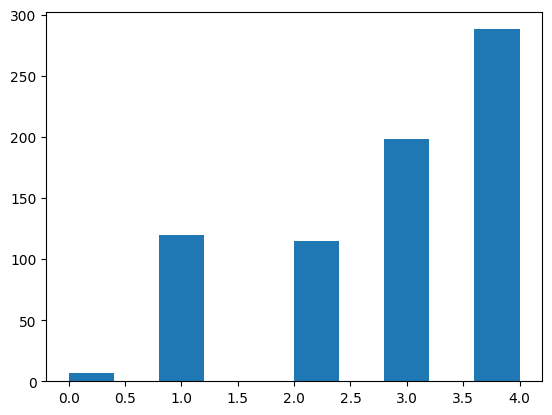

In [39]:
plt.hist(df_incomeScore['incomeScore'],bins=10)

[1, 2, 3, 4]
[0.0, 4.223375075693099, 8.326478084715706, 10.0]
y1_error: 0.47
y2_error: 0.07
y3_error: 0.00
 


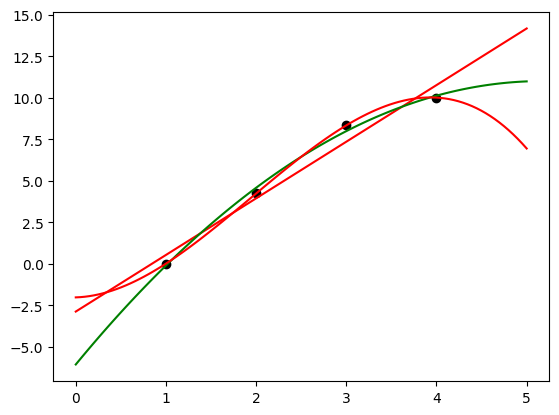

In [40]:
trend_details = ext.chk_trend(company['NFLX']['income']['totalRevenue'])
ext.show_trend(trend_details)

In [41]:

ticker = 'FIVE'
company[ticker]['incomeScore'] = scoreIncome(company[ticker]['inc_trend'],company_inc_median[ticker])
company[ticker]['incomeScore']

{'score': 4,
 'scoreBreakdown': {'totalRevenue': 4,
  'grossProfit': 4,
  'operatingIncome': 4,
  'netIncome': 4,
  'dilutedEPS': 4}}

In [42]:
# Check income sheets for company

transpose_table(company[ticker]['income'])

Company:  ['FIVE']


2020                    2021  \
company                                          FIVE                    FIVE   
yahoo_sector                        Consumer Cyclical       Consumer Cyclical   
gics_sector                    Consumer Discretionary  Consumer Discretionary   
industry                             Specialty Retail        Specialty Retail   
st_date                                    2020-01-31              2021-01-31   
st_YR                                            2020                    2021   
st_Mnth                                            01                      01   
totalRevenue                            1846730000.00           1962137000.00   
costOfRevenue                           1172764000.00           1309807000.00   
grossProfit                              673966000.00            652330000.00   
netIncome                                175056000.00            123361000.00   
operatingIncome                          217284000.00            154803000.00   
netIncomeContinuousOperations            175056000.00            123361000.00   
netInterestIncome                          4285000.00             -1736000.00   
interestIncome                             4285000.00                    0.00   
otherIncomeExpense                               0.00                    0.00   
operatingExpense                         456682000.00            497527000.00   
totalExpenses                           1629446000.00           1807334000.00   
taxProvision                              46513000.00             29706000.00   
interestExpense                                  0.00              1736000.00   
SGA                                      456682000.00            497527000.00   
researchAndDevelopment                           0.00                    0.00   
ebit                                     217284000.00            154803000.00   
dilutedEPS                                       3.12                    2.20   
basicEPS                                         3.14                    2.21   

                                                 2022                    2023  
company                                          FIVE                    FIVE  
yahoo_sector                        Consumer Cyclical       Consumer Cyclical  
gics_sector                    Consumer Discretionary  Consumer Discretionary  
industry                             Specialty Retail        Specialty Retail  
st_date                                    2022-01-31              2023-01-31  
st_YR                                            2022                    2023  
st_Mnth                                            01                      01  
totalRevenue                            2848354000.00           3076308000.00  
costOfRevenue                           1817910000.00           1980817000.00  
grossProfit                             1030444000.00           1095491000.00  
netIncome                                278810000.00            261528000.00  
operatingIncome                          379880000.00            345043000.00  
netIncomeContinuousOperations            278810000.00            261528000.00  
netInterestIncome                        -13177000.00              2491000.00  
interestIncome                                   0.00                    0.00  
otherIncomeExpense                               0.00                    0.00  
operatingExpense                         650564000.00            750448000.00  
totalExpenses                           2468474000.00           2731265000.00  
taxProvision                              87893000.00             86006000.00  
interestExpense                           13177000.00                    0.00  
SGA                                      650564000.00            750448000.00  
researchAndDevelopment                           0.00                    0.00  
ebit                                     379880000.00            345043000.00  
dilutedEPS            

If we look at totalRevenue, grossProfit, ebit we see that they well above threshold and there is a positive trend.
So the overall score of 4 looks justified.

[1, 2, 3, 4]
[3.345454545454545, 0.0, 10.0, 9.054545454545455]
y1_error: 7.74
y2_error: 7.38
y3_error: 0.00
 


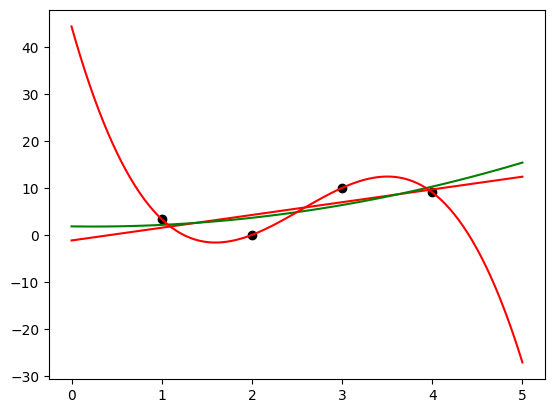

In [43]:
# Take a closer look at trend and pattern for eps

trend_details = ext.chk_trend(company[ticker]['income']['dilutedEPS'])
ext.show_trend(trend_details)

Steady positive trend although values have fluctuated.

In [44]:
# Take a look at a company that scores low

ticker = 'INTC'
company[ticker]['incomeScore']

{'score': 1,
 'scoreBreakdown': {'totalRevenue': 2,
  'grossProfit': 1,
  'operatingIncome': 1,
  'netIncome': 1,
  'dilutedEPS': 1}}

In [45]:
transpose_table(company[ticker]['income'])

Company:  ['INTC']


2019                    2020  \
company                                          INTC                    INTC   
yahoo_sector                               Technology              Technology   
gics_sector                    Information Technology  Information Technology   
industry                               Semiconductors          Semiconductors   
st_date                                    2019-12-31              2020-12-31   
st_YR                                            2019                    2020   
st_Mnth                                            12                      12   
totalRevenue                           71965000000.00          77867000000.00   
costOfRevenue                          29825000000.00          34255000000.00   
grossProfit                            42140000000.00          43612000000.00   
netIncome                              21048000000.00          20899000000.00   
operatingIncome                        22428000000.00          23876000000.00   
netIncomeContinuousOperations          21048000000.00          20899000000.00   
netInterestIncome                        484000000.00           -504000000.00   
interestIncome                           483000000.00            272000000.00   
otherIncomeExpense                      1146000000.00           1706000000.00   
operatingExpense                       19712000000.00          19736000000.00   
totalExpenses                          49537000000.00          53991000000.00   
taxProvision                            3010000000.00           4179000000.00   
interestExpense                          489000000.00            504000000.00   
SGA                                     6150000000.00           6180000000.00   
researchAndDevelopment                 13362000000.00          13556000000.00   
ebit                                   22428000000.00          25582000000.00   
dilutedEPS                                       4.71                    4.94   
basicEPS                                         4.77                    4.98   

                                                 2021                    2022  
company                                          INTC                    INTC  
yahoo_sector                               Technology              Technology  
gics_sector                    Information Technology  Information Technology  
industry                               Semiconductors          Semiconductors  
st_date                                    2021-12-31              2022-12-31  
st_YR                                            2021                    2022  
st_Mnth                                            12                      12  
totalRevenue                           79024000000.00          63054000000.00  
costOfRevenue                          35209000000.00          36188000000.00  
grossProfit                            43815000000.00          26866000000.00  
netIncome                              19868000000.00           8014000000.00  
operatingIncome                        22082000000.00           2336000000.00  
netIncomeContinuousOperations          19868000000.00           8017000000.00  
netInterestIncome                       -482000000.00           1166000000.00  
interestIncome                           144000000.00            589000000.00  
otherIncomeExpense                       103000000.00           4266000000.00  
operatingExpense                       21733000000.00          24530000000.00  
totalExpenses                          56942000000.00          60718000000.00  
taxProvision                            1835000000.00           -249000000.00  
interestExpense                          597000000.00            496000000.00  
SGA                                     6543000000.00           7002000000.00  
researchAndDevelopment                 15190000000.00          17528000000.00  
ebit                                   22082000000.00           8264000000.00  
dilutedEPS            

In [46]:
company[ticker]['inc_trend']

{'totalRevenue': -2,
 'costOfRevenue': 3,
 'grossProfit': -3,
 'netIncome': -3,
 'operatingIncome': -3,
 'ebit': -3,
 'dilutedEPS': -3}

Low score for INTC is due to sharp downward trend on key indicators

[1, 2, 3, 4]
[9.23333333333333, 10.0, 9.73333333333333, 0.0]
y1_error: 7.78
y2_error: 0.89
y3_error: 0.00
 


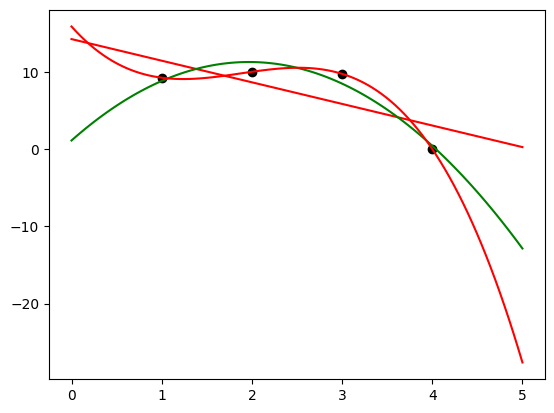

In [47]:

trend_details = ext.chk_trend(company[ticker]['income']['dilutedEPS'])
ext.show_trend(trend_details)

[1, 2, 3, 4]
[9.01174110566995, 9.880228922060297, 9.999999999999998, 0.0]
y1_error: 8.48
y2_error: 1.10
y3_error: 0.00
 


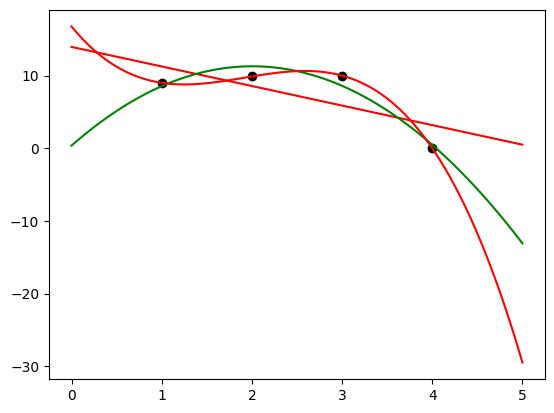

In [48]:
trend_details = ext.chk_trend(company[ticker]['income']['grossProfit'])
ext.show_trend(trend_details)

## Score Balance Sheet

0 - Poor, 4 - Excellent

If stockholders equity is negative then the company's liabilities exceed its assets so it is has limited intrinsic
value. Apply a threshold so that we downgrade companies with negligible net asset value.



In [49]:
def scoreBalance(balanceTrend, balanceMedian,industry):

  equityThreshold = 100000000
  cashThreshold = 10000000
  debtCapitalThreshold = 90
  debtAssetThreshold = 90

  s1 = {}

  # Stockholders Equity
    
  # If stockholders equity is below threshold then treat net asset value as negligible 
  # and score as 0. Otherwise consider trend to determine score.

  feature = 'stockholdersEquity'

  if balanceMedian[feature] < equityThreshold:
    s1[feature] = 0
  else:
    if balanceTrend[feature] < -2:
      s1[feature] = 1
    elif balanceTrend[feature] < 0:
      s1[feature] = 2
    elif balanceTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Retained Profits

  # Positive and high retained profits is a sign of strength but a number of factors can influence whether this
  # is a good thing. Negative retained profits is bad as it signals losses in previous years and perhaps dividend
  # payouts not funded from earnings. 
    
  # Consider positive retained profit as ok and apply max score. For negative, set score to 0 and upgrade score 
  # if there is a positive trend.
    
  feature = 'retainedEarnings'

  if balanceMedian[feature] < 0:
    
    # Set score to 0 and upgrade if trend is positive
    
    s1[feature] = 0
  
    if balanceTrend[feature] > 2:
      s1[feature] = 2
    elif balanceTrend[feature] > 0:
      s1[feature] = 1
  else:
    # If retained profits is positive, set score to max
    
    s1[feature] = 4

  # Cash Assets

  # One would expect all companies to hold a minimum of cash to cover short term liabilities so any below
  # specified threshold should be scored 0. Any above threshold should be scored according to trend. 

  # A positive trend (>0) is reassuring while a declining trend may raise concerns even if historical cash 
  # positions have been good).

  feature = 'cashEquivalent'

  if balanceMedian[feature] < cashThreshold:
    s1[feature] = 0
  else:
    if balanceTrend[feature] < -2:
      s1[feature] = 1
    elif balanceTrend[feature] < 0:
      s1[feature] = 2
    elif balanceTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
    
  # Working Capital

  # Various factors such as accounts receivables and inventory can affect this figure from one period to another. 
  # Also a positive trend is not necessarily a good thing as it may indicate in increase in inventory and goods 
  # not sold as quickly. 
    
  # So let's concern ourselves only where negative working capital. Where this is the case, a negative trend 
  # indicates a worsening gap between current assets and liabilities while a positive trend indicates an 
  # improvement.

  # A negative working capital depends on industry and with a strong positive trend, should not by itself be a 
  # reason for not buying the stock. If other indicators are weak then this will drive the overall score down 
  # anyway.

  feature = 'workingCapital'
    
  if balanceMedian[feature] < 0:
    if balanceTrend[feature] < -2:
      s1[feature] = 0
    elif balanceTrend[feature] < 0:
      s1[feature] = 1
    elif balanceTrend[feature] < 2:
      s1[feature] = 2
    else:
      s1[feature] = 3
  else:
    # Set score to max if working capital is positive
    s1[feature] = 4
    
  # Quick Ratio
  
  # Determines how strong the company is in paying off short term liabilities using cash assets. 

  # Quick ratios vary according to industry with retail having very low values. We need to take care not to 
  # exclude companies belonging to certain sectors while balancing risk. 
    
  feature = 'quickRatio'
    
  if balanceMedian[feature] < 0.2:
    s1[feature] = 0
  elif balanceMedian[feature] < 0.5:
    s1[feature] = 1
  elif balanceMedian[feature] < 1.0:
    s1[feature] = 2
  elif balanceMedian[feature] < 1.5:
    s1[feature] = 3
  else:
    s1[feature] = 4

  # Quick ratio is low for some industries such as retail. Ignore declining trends as it tends to cause 
  # distortions to the overall score. However consider positive trends to improve score unless the score is 0.

  if s1[feature] > 0:
    
    if balanceTrend[feature] >  2:
      # Steeep incline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] >  0:
      # Gentle incline
      s1[feature] = min(s1[feature] + 1,4)
  
  # Current Ratio

  feature = 'currentRatio'
    
  if balanceMedian[feature] < 0.5:
    s1[feature] = 0
  elif balanceMedian[feature] < 1:
    s1[feature] = 1
  elif balanceMedian[feature] < 2:
    s1[feature] = 2
  elif balanceMedian[feature] < 3:
    s1[feature] = 3
  else:
    s1[feature] = 4

  # Upgrade score if there is a positive trend and the score is not 0.
  # The intuition is that unless it is really bad (score of 0), take into consideration improving trend.
    
  if s1[feature] > 0:
    
    if balanceTrend[feature] >  2:
      # Steeep incline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] >  0:
      # Gentle incline
      s1[feature] = min(s1[feature] + 1,4)
 
  # Solvency Rato - Debt to Capital Ratio

  # Indication of level of leverage. Consider industry norm plus max threshold of 75%.
    
  # If stockholder equity is below threshold then set a default score of 0 as it is meaningless to calculate 
  # a ratio where equity is negligible or even negative.
    
  # Set score to 0 if leverage is > 80%
  
  feature = 'debtCapitalRatio'

  if balanceMedian['stockholdersEquity'] < equityThreshold:
    s1[feature] = 0
  elif balanceMedian[feature] > debtCapitalThreshold:
    s1[feature] = 0 
  elif balanceMedian[feature] > 80:
    s1[feature] = 1
  elif balanceMedian[feature] > 70:
     s1[feature] = 2
  elif balanceMedian[feature] > 60:
     s1[feature] = 3
  else:
     s1[feature] = 4
    
  # Now consider trend

  # If the score is 4 then we have deemed the ratio to be really good and if it is 0 then bad. For any score
  # in between, consider trend as a signs of improvment or decline. 
    
  # The balance we are looking to achieve here is the trade off between risk associated with high leverage and 
  # trend which signals improvement or decline.

  if (s1[feature] > 0)  & (s1[feature] < 4):

    if balanceTrend[feature] < -2:
      # Steep decline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] < 0.01:
      # Gentle decline
      s1[feature] = min(s1[feature] + 1,4)
    elif balanceTrend[feature] < 2:
      # Gentle incline
      s1[feature] = max(s1[feature] - 1,0)
    else:
      # Steep incline
      s1[feature] = max(s1[feature] - 2,0)

  
  # Solvency - Debt to Asset Ratio

  # Given that shareholder equity is negative or small in many cases, it makes sense to consider debt to asset
  # ratio as well to assess levels of debt relative to assets. 

  # Also we want to create a bias against companies with high levels of debt so considering both scores will help
  # this. 

  # If ratio is above threshold then set score to 0.

  feature = 'debtAssetRatio'

  if balanceMedian[feature] > debtAssetThreshold:
    s1[feature] = 0 
  elif balanceMedian[feature] > 70:
    s1[feature] = 1
  elif balanceMedian[feature] > 50:
     s1[feature] = 2
  elif balanceMedian[feature] > 30:
     s1[feature] = 3
  else:
     s1[feature] = 4
  
  # Now consider trend
  
  # If the score is 4 then we have deemed the ratio to be really good and if it is 0 then bad. For any score
  # in between, consider trend as a signs of improvment or decline. 
    
  # The balance we are looking to achieve here is the trade off between risk associated with high leverage and 
  # trend which signals improvement or decline. Ignore trend if score is 0 (high levels of debt or 4 very low
  # levels of debt.)

  if (s1[feature] > 0)  & (s1[feature] < 4):

    if balanceTrend[feature] < -2:
      # Steep decline
      s1[feature] = min(s1[feature] + 2,4)
    elif balanceTrend[feature] < 0.01:
      # Gentle decline
      s1[feature] = min(s1[feature] + 1,4)
    elif balanceTrend[feature] < 2:
      # Gentle incline
      s1[feature] = max(s1[feature] - 1,0)
    else:
      # Steep incline
      s1[feature] = max(s1[feature] - 2,0)

  # Scoring

  # Determine mean score. If any of the scores are 0 then apply a ceiling of 2.
    
  # if any of the scores are 0 then take mean and the lower integer floor value, outherwise round to nearest 
  # integer.
    
  # This strategy prevents a single factor preventing a score achieving max score of 4 because of a single factor
  # while preventing poor indicators (ones scoring 0) from scoring high than desired.

  l_scores = list(s1.values())
    
  meanScore = np.mean(l_scores)

  if min(l_scores) == 0:
    FinalScore = min(int(meanScore),2)    
  else:
    FinalScore = min(int(meanScore),4)

  score = {'score': FinalScore,
           'scoreBreakdown': s1}

  return score

In [50]:
l_score = []

for ticker in company:
    
  print(ticker)
  company[ticker]['balanceScore'] = scoreBalance(company[ticker]['bal_trend'],
                                                 company[ticker]['bal_median'],
                                                 company[ticker]['industry'])  
 
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'balanceScore': company[ticker]['balanceScore']['score'],
                 'stockholdersEquity': company[ticker]['balanceScore']['scoreBreakdown']['stockholdersEquity'],
                 'retainedEarnings': company[ticker]['balanceScore']['scoreBreakdown']['retainedEarnings'],
                 'cashEquivalent': company[ticker]['balanceScore']['scoreBreakdown']['cashEquivalent'],
                 'workingCapital': company[ticker]['balanceScore']['scoreBreakdown']['workingCapital'],
                 'currentRatio': company[ticker]['balanceScore']['scoreBreakdown']['currentRatio'],
                 'debtAssetRatio': company[ticker]['balanceScore']['scoreBreakdown']['debtAssetRatio']})
                  
  l_score.append(S)

df_balanceScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


(array([ 21.,   0.,  68.,   0.,   0., 219.,   0., 358.,   0.,  62.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

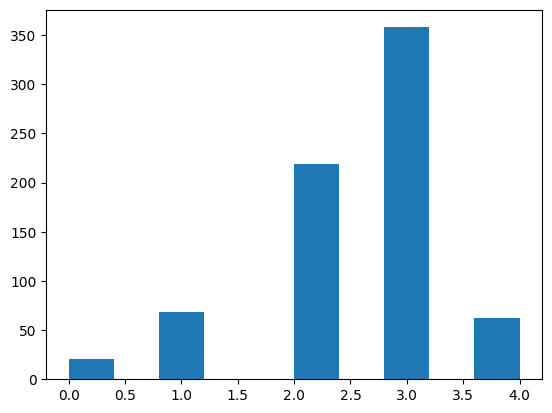

In [51]:
# Check distribution of Scores

plt.hist(df_balanceScore['balanceScore'],bins=10)

In [52]:
df_balanceScore.sort_values(by='balanceScore')

company                                industry  balanceScore  \
717  JBLU_S                                Airlines             0   
414    MSGS                           Entertainment             0   
56     ATUS                        Telecom Services             0   
217     EVA                Lumber & Wood Production             0   
711  ALNY_S                           Biotechnology             0   
712    BA_S                     Aerospace & Defense             0   
713  EXAS_S                  Diagnostics & Research             0   
102     CAR               Rental & Leasing Services             0   
715    GH_S                  Diagnostics & Research             0   
716  IONS_S                           Biotechnology             0   
562     SIX                                 Leisure             0   
121    CHTR                        Telecom Services             0   
719  LYFT_S                    Software—Application             0   
720  NVAX_S                           Biotechnology             0   
721   OSH_S                 Medical Care Facilities             0   
618    TRGP                     Oil & Gas Midstream             0   
723  PTON_S                                 Leisure             0   
552    SBUX                             Restaurants             0   
251     GEN                 Software—Infrastructure             0   
249    GDDY                 Software—Infrastructure             0   
718   LVS_S                       Resorts & Casinos             0   
500      PM                                 Tobacco             1   
727  WOLF_S                          Semiconductors             1   
473    PANW                 Software—Infrastructure             1   
478     PCG            Utilities—Regulated Electric             1   
470     OVV                           Oil & Gas E&P             1   
469    OTIS          Specialty Industrial Machinery             1   
481    PDCE                           Oil & Gas E&P             1   
526     RCL                         Travel Services             1   
575    SPLK                 Software—Infrastructure             1   
542     RRC                           Oil & Gas E&P             1   
95      BSY                    Software—Application             1   
559     SHW                     Specialty Chemicals             1   
560    SIRI                           Entertainment             1   
467    ORLY                        Specialty Retail             1   
593       T                        Telecom Services             1   
596     TDG                     Aerospace & Defense             1   
75     BBWI                        Specialty Retail             1   
599    TEAM                    Software—Application             1   
535     RNG                    Software—Application             1   
140    COTY           Household & Personal Products             1   
417    MTCH          Internet Content & Information             1   
156    CVNA                Auto & Truck Dealerships             1   
225    EXPE                         Travel Services             1   
277     HBI                   Apparel Manufacturing             1   
278     HCA                 Medical Care Facilities             1   
284     HLT                                 Lodging             1   
289     HPQ                       Computer Hardware             1   
333     JWN                       Department Stores             1   
353    LESL                        Specialty Retail             1   
192     DVA                 Medical Care Facilities             1   
362     LNG                     Oil & Gas Midstream             1   
726   TXG_S             Health Information Services             1   
188     DTE            Utilities—Regulated Electric             1   
365     LOW                 Home Improvement Retail             1   
185     DPZ                             Restaurants             1   
376     LYV                           Entertainment             1   
38

Let's take a closer look at Starbucks as it scores badly

In [53]:
# Show score breakdown

company['SBUX']['balanceScore']

{'score': 0,
 'scoreBreakdown': {'stockholdersEquity': 0,
  'retainedEarnings': 0,
  'cashEquivalent': 3,
  'workingCapital': 1,
  'quickRatio': 2,
  'currentRatio': 1,
  'debtCapitalRatio': 0,
  'debtAssetRatio': 0}}

In [54]:
# Check Table

transpose_table(company['SBUX']['balance'])

Company:  ['SBUX']


2019  \
company                                               SBUX   
yahoo_sector                             Consumer Cyclical   
gics_sector                         Consumer Discretionary   
industry                                       Restaurants   
st_date                                         2019-09-30   
st_YR                                                 2019   
st_Mnth                                                 09   
cashEquivalent                               2757100000.00   
receivables                                   879200000.00   
finishedGoods                                 564500000.00   
workInProcess                                         0.00   
rawMaterials                                  964900000.00   
otherCurrentAssets                                    0.00   
inventory                                    1529400000.00   
currentAssets                                5653900000.00   
netPPE                                       6431700000.00   
otherNonCurrentAssets                         479600000.00   
financialAssets                                       0.00   
goodwill                                     3490800000.00   
goodwillAndOtherIntangibleAssets             4272600000.00   
otherIntangibleAssets                         781800000.00   
nonCurrentAccountsReceivable                          0.00   
totalNonCurrentAssets                       13565700000.00   
currentDebt                                           0.00   
payablesAndAccruedExpenses                   4689200000.00   
otherCurrentLiabilities                               0.00   
currentLiabilities                           6168700000.00   
longTermDebt                                11167000000.00   
otherNonCurrentLiabilities                   1370500000.00   
nonCurrentDeferredLiabilities                6744400000.00   
nonCurrentDeferredTaxesLiabilities                    0.00   
longTermProvisions                                    0.00   
totalNonCurrentLiabilities                  19281900000.00   
retainedEarnings                            -5771200000.00   
stockholdersEquity                          -6232200000.00   
totalDebt                                   11167000000.00   
totalAssets                                 19219600000.00   
totalLiabilities                            25450600000.00   
workingCapital                               -514800000.00   
quickRatio                                            0.67   
currentRatio                                          0.92   
debtCapitalRatio                                    226.29   
debtAssetRatio                                       58.10   

                                                      2020  \
company                                               SBUX   
yahoo_sector                             Consumer Cyclical   
gics_sector                         Consumer Discretionary   
industry                                       Restaurants   
st_date                                         2020-09-30   
st_YR                                                 2020   
st_Mnth                                                 09   
cashEquivalent                               4632100000.00   
receivables                                   883400000.00   
finishedGoods                                 517400000.00   
workInProcess                                         0.00   
rawMaterials                                 1034000000.00   
otherCurrentAssets                                    0.00   
inventory                                    1551400000.00   
currentAssets                                7806400000.00   
netPPE                                      14375500000.00   
otherNonCurrentAssets                         568600000.00   
financialAssets                                       0.00   
goodwill                                     3597200000.00   
goodwillAndOtherIntangibleAssets             4149300000.00   
otherIntangibleAssets  

Note negative stockholders equity and retainedEarnings. Also high level of debt.

In [55]:
company['SBUX']['bal_median']['workingCapital']

-27600000.0

-27600000.0
[1, 2, 3, 4]
[4.329204676172386, 6.935876514806987, 10.0, 0.0]
y1_error: 12.22
y2_error: 2.29
y3_error: 0.00
 


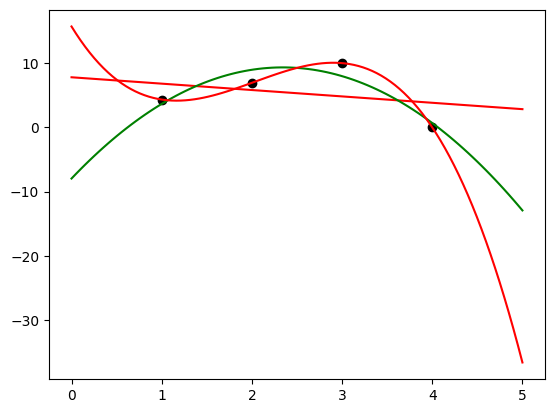

In [56]:
feature='workingCapital'
ticker = 'SBUX'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

Working capital varies but the median is negative and the trend is negative.

2593850000.0
[1, 2, 3, 4]
[0.0, 9.26743855885415, 7.099094551534845, 10.0]
y1_error: 5.94
y2_error: 3.41
y3_error: 0.00
 


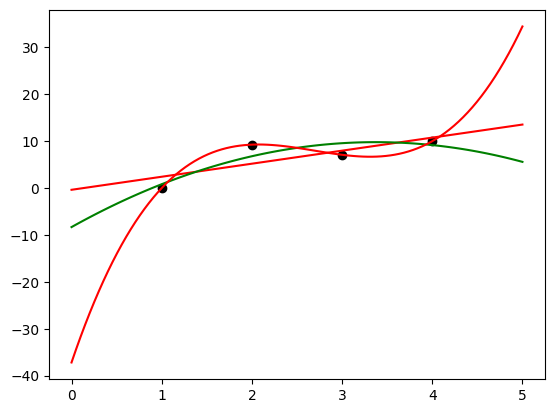

In [57]:
feature='currentDebt'
ticker = 'SBUX'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

Debt levels are increasing.

In [58]:
# Display trend scores for all the variables

company['SBUX']['bal_trend']

{'cashEquivalent': 1,
 'receivables': 3,
 'inventory': 3,
 'currentAssets': 1,
 'netPPE': 3,
 'goodwill': -1,
 'totalNonCurrentAssets': 3,
 'currentDebt': 3,
 'payablesAndAccruedExpenses': 0,
 'otherCurrentLiabilities': 0,
 'currentLiabilities': 3,
 'longTermDebt': 2,
 'totalNonCurrentLiabilities': 2,
 'retainedEarnings': -2,
 'stockholdersEquity': -1,
 'totalDebt': 3,
 'totalAssets': 2,
 'totalLiabilities': 3,
 'workingCapital': -1,
 'debtCapitalRatio': -2,
 'debtAssetRatio': 3,
 'quickRatio': -1,
 'currentRatio': -1}

Increasing inventory, retained profits are declining. Overall, the score looks justified.

In [59]:
# Let's take a look at Google

transpose_table(company['GOOG']['balance'])

Company:  ['GOOG']


2019  \
company                                                       GOOG   
yahoo_sector                                Communication Services   
gics_sector                                 Communication Services   
industry                            Internet Content & Information   
st_date                                                 2019-12-31   
st_YR                                                         2019   
st_Mnth                                                         12   
cashEquivalent                                     119675000000.00   
receivables                                         27492000000.00   
finishedGoods                                                 0.00   
workInProcess                                                 0.00   
rawMaterials                                                  0.00   
otherCurrentAssets                                   4412000000.00   
inventory                                             999000000.00   
currentAssets                                      152578000000.00   
netPPE                                              84587000000.00   
otherNonCurrentAssets                                2342000000.00   
financialAssets                                               0.00   
goodwill                                            20624000000.00   
goodwillAndOtherIntangibleAssets                    22603000000.00   
otherIntangibleAssets                                1979000000.00   
nonCurrentAccountsReceivable                                  0.00   
totalNonCurrentAssets                              123331000000.00   
currentDebt                                          1199000000.00   
payablesAndAccruedExpenses                          34818000000.00   
otherCurrentLiabilities                              9405000000.00   
currentLiabilities                                  45221000000.00   
longTermDebt                                        14768000000.00   
otherNonCurrentLiabilities                           2534000000.00   
nonCurrentDeferredLiabilities                        2059000000.00   
nonCurrentDeferredTaxesLiabilities                   1701000000.00   
longTermProvisions                                            0.00   
totalNonCurrentLiabilities                          29246000000.00   
retainedEarnings                                   152122000000.00   
stockholdersEquity                                 201442000000.00   
totalDebt                                           15967000000.00   
totalAssets                                        275909000000.00   
totalLiabilities                                    74467000000.00   
workingCapital                                     107357000000.00   
quickRatio                                                    3.35   
currentRatio                                                  3.37   
debtCapitalRatio                                              7.34   
debtAssetRatio                                                5.79   

                                                              2020  \
company                                                       GOOG   
yahoo_sector                                Communication Services   
gics_sector                                 Communication Services   
industry                            Internet Content & Information   
st_date                                                 2020-12-31   
st_YR                                                         2020   
st_Mnth                                                         12   
cashEquivalent                                     136694000000.00   
receivables                                         31384000000.00   
finishedGoods                                                 0.00   
workInProcess                                                 0.00   
rawMaterials                                                  0.00   
otherCurrentAssets                                   5490000000.00   
i

In [60]:
company['GOOG']['balanceScore']

{'score': 3,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 4,
  'cashEquivalent': 2,
  'workingCapital': 4,
  'quickRatio': 4,
  'currentRatio': 4,
  'debtCapitalRatio': 4,
  'debtAssetRatio': 4}}

128184500000.0
[1, 2, 3, 4]
[2.284158071618956, 8.858500405608991, 9.999999999999991, 0.0]
y1_error: 17.58
y2_error: 0.41
y3_error: 0.00
 


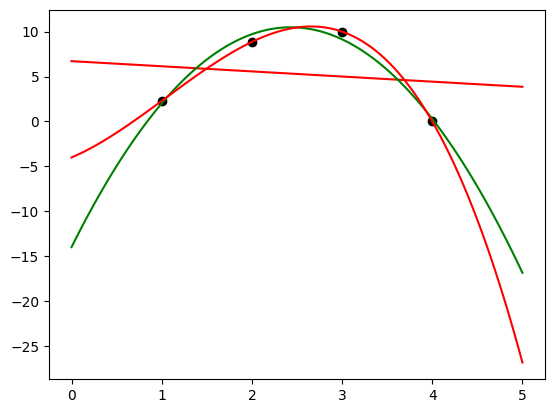

In [61]:
feature='cashEquivalent'
ticker = 'GOOG'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

Company has an excellent balance sheet with massive amounts of cash. Declining trend on cash results in a score of 2 
for this feature.

## Score Cash Sheet

0 - Poor
4 - Excellent

Free cashflow should be positive.

Determine what percentage of free cash flow is spent on capital expenditure.

Is stock buy backs and dividends coverned by free cashflow.

How is money spent:
    
    Dividends, stock buy backs acquisitions, investment in own company
    
How is finance raised:
    
    Stock issuance, debt issuance, asset sales
    
May be an idea to just concentrate on free cash flow and related trend, cover for spend on share buy backs,
dividends and capex.


In [62]:
def scoreCash(cashTrend, cashMedian,industry):

  T_operatingCashFlow = 10000000
  T_freeCashFlow = 10000000

  s1={}

  # Operating CashFlow
    
  # This is the amount of cash generated by company and is available to spend. 

  feature='cashFlowOperatingActivities'
    
  if cashMedian[feature] < T_operatingCashFlow:
    s1[feature] = 0
  else:
    if cashTrend[feature] < -2:
      s1[feature] = 1
    elif cashTrend[feature] < 0:
      s1[feature] = 2
    elif cashTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4

  # Free Cashflow

  # Amount of cash left after allowing for capital expenditure. This is essentially spare cash which the company
  # can use to pay dividends, buy back stock, makes investments etc.
    
  feature='freeCashFlow'
    
  if cashMedian[feature] < T_freeCashFlow:
    s1[feature] = 0
  else:
    if cashTrend[feature] < -2:
      s1[feature] = 1
    elif cashTrend[feature] < 0:
      s1[feature] = 2
    elif cashTrend[feature] < 2:
      s1[feature] = 3
    else:
      s1[feature] = 4
 
  # Is the money spent on dividends and stock buy backs covered by free cash flow generated?

  # If ratio > 1 then it means that dividends paid plus stock buy backs exceed free cash flow.
  # Also allow for free cashflow being negative.
    
  feature = 'dividendCover'
  totalDivStockBuyBack = cashMedian['cashDividendsPaid'] + cashMedian['repurchaseOfCapitalStock']
  ratio = totalDivStockBuyBack / cashMedian['freeCashFlow']
    
  if (cashMedian['freeCashFlow'] < 0) & (totalDivStockBuyBack > 0):
    # Dividends and/or buybacks occuring while free cash flow is negative
    s1[feature] = 0
  elif ratio > 1 or cashMedian['freeCashFlow'] < 0:
    # Dividend payments and stock repurchases not fully covered by free cash flow
    s1[feature] = 1
  elif ratio > 0.80:
    # Amount of free cash flow distributed is high, question whether this is sustainable
    s1[feature] = 2
  elif ratio > 0.50:
    s1[feature] = 3
  else:
    s1[feature] = 4
 
  # Check trend for Dividend payments and stock buybacks

  feature = 'commonStockDividendPaid'
    
  if cashMedian[feature] == 0:
    # Stock does not pay dividends. Not a negative so set score to 2.
    temp_div_score = 2
  else:
    if cashTrend[feature] < -2:
      temp_div_score = 1
    elif cashTrend[feature] < 0:
      temp_div_score = 2
    elif cashTrend[feature] < 2:
      temp_div_score = 3
    else:
      temp_div_score = 4  
   
  feature = 'repurchaseOfCapitalStock'
    
  if cashMedian[feature] == 0:
    # Stock does not buy back stock. Not a negative so set score to 2.
    temp_rep_score = 2
  else:
    if cashTrend[feature] < -2:
      temp_rep_score = 1
    elif cashTrend[feature] < 0:
      temp_rep_score = 2
    elif cashTrend[feature] < 2:
      temp_rep_score = 3
    else:
      temp_rep_score = 4  
  
  # Some companies have a tendency to pay dividends and increase them progressively in line 
  # with business performance. Others tend to buyback stock. Of these, there are those who do a combination 
  # of both. 

  # Take the max score from dividend payments and stock buybacks.

  s1['stockDivBuyBack'] = max(temp_rep_score,temp_div_score)
    
  # This strategy prevents a single factor preventing a score achieving max score of 4
  # while preventing poor indicators (ones scoring 0) from scoring high than desired.

  l_scores = list(s1.values())
    
  meanScore = np.mean(l_scores)

  if min(l_scores) == 0:
    FinalScore = min(int(meanScore),2)    
  else:
    FinalScore = min(round(meanScore),4)

  score = {'score': FinalScore,
           'scoreBreakdown': s1}

  return score    
    

In [63]:
l_score = []

for ticker in company:
    
  print(ticker)
  company[ticker]['cashScore'] = scoreCash(company[ticker]['cash_trend'],
                                           company[ticker]['cash_median'],
                                           company[ticker]['industry'])  
 
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'cashScore': company[ticker]['cashScore']['score'],
                 'cashFlowOperatingActivities': company[ticker]['cashScore']['scoreBreakdown']['cashFlowOperatingActivities'],
                 'freeCashFlow': company[ticker]['cashScore']['scoreBreakdown']['freeCashFlow'],
                 'dividendCover': company[ticker]['cashScore']['scoreBreakdown']['dividendCover'],
                 'stockDivBuyBack': company[ticker]['cashScore']['scoreBreakdown']['stockDivBuyBack']})
                  
  l_score.append(S)

df_cashScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


(array([ 58.,   0.,  61.,   0.,   0., 170.,   0., 223.,   0., 216.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

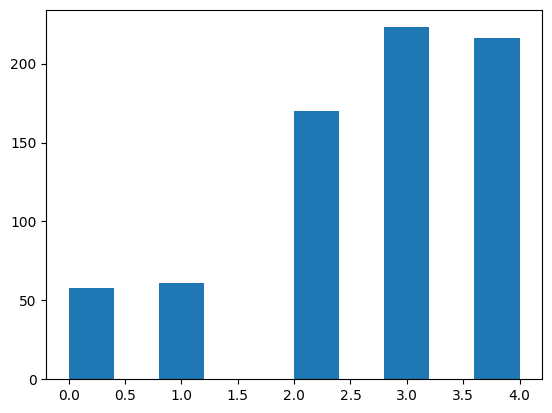

In [64]:
# Check distribution of Scores

plt.hist(df_cashScore['cashScore'],bins=10)

In [65]:
df_cashScore.sort_values(by='cashScore').reset_index()

index company                                industry  cashScore  \
0      727  WOLF_S                          Semiconductors          0   
1      508     PPL            Utilities—Regulated Electric          0   
2      513    PTON                                 Leisure          0   
3      521      QS                              Auto Parts          0   
4      523    RARE                           Biotechnology          0   
5      526     RCL                         Travel Services          0   
6      532    RIVN                      Auto Manufacturers          0   
7      547     RUN                                   Solar          0   
8      106     CCL                         Travel Services          0   
9      549       S                 Software—Infrastructure          0   
10      83    BILL                    Software—Application          0   
11     575    SPLK                 Software—Infrastructure          0   
12      71      BA                     Aerospace & Defense          0   
13     577     SPR                     Aerospace & Defense          0   
14     580    SRPT                           Biotechnology          0   
15     613    TOST                 Software—Infrastructure          0   
16     631    TWLO          Internet Content & Information          0   
17     557    SGEN                           Biotechnology          0   
18     111     CEG                     Utilities—Renewable          0   
19     114    CFLT                 Software—Infrastructure          0   
20     484     PEN                         Medical Devices          0   
21     220    EXAS                  Diagnostics & Research          0   
22     243    FRPT                          Packaged Foods          0   
23     254      GH                  Diagnostics & Research          0   
24     259     GME                        Specialty Retail          0   
25     178    DKNG                                Gambling          0   
26     726   TXG_S             Health Information Services          0   
27     373     LVS                       Resorts & Casinos          0   
28     375    LYFT                    Software—Application          0   
29     388     MDB                 Software—Infrastructure          0   
30     156    CVNA                Auto & Truck Dealerships          0   
31     409    MRTX                           Biotechnology          0   
32     424    NCLH                         Travel Services          0   
33     425    NCNO                    Software—Application          0   
34     443    NTRA                  Diagnostics & Research          0   
35     445    NVAX                           Biotechnology          0   
36     468     OSH                 Medical Care Facilities          0   
37     475    PATH                 Software—Infrastructure          0   
38     632     TXG             Health Information Services          0   
39     638    UBER                    Software—Application          0   
40     499    PLUG            Electrical Equipment & Parts          0   
41     711  ALNY_S                           Biotechnology          0   
42      35     AMC                           Entertainment          0   
43     721   OSH_S                 Medical Care Facilities          0   
44     723  PTON_S                                 Leisure          0   
45      22    AFRM                 Software—Infrastructure          0   
46     724  RARE_S                           Biotechnology          0   
47     712    BA_S                     Aerospace & Defense          0   
48     713  EXAS_S                  Diagnostics & Research          0   
49     719  LYFT_S                    Software—Application          0   
50      31    ALNY                           Biotechnology          0   
51     720  NVAX_S                           Biotechnology          0   
52     722  PLUG_S            Electrical Equipment & Parts          0   
53     725  SGEN_S                           Biotechnology     

In [66]:
ticker='PEP'
company[ticker]['cashScore']

{'score': 3,
 'scoreBreakdown': {'cashFlowOperatingActivities': 4,
  'freeCashFlow': 3,
  'dividendCover': 1,
  'stockDivBuyBack': 4}}

In [67]:
# Check cash statement
transpose_table(company[ticker]['cash'])

Company:  ['PEP']


2019  \
company                                                     PEP   
yahoo_sector                                 Consumer Defensive   
gics_sector                                    Consumer Staples   
industry                                Beverages—Non-Alcoholic   
st_date                                              2019-12-31   
st_YR                                                      2019   
st_Mnth                                                      12   
netIncome                                         7314000000.00   
netIncomeFromContinuingOperations                 7353000000.00   
depreciation                                      2432000000.00   
stockBasedCompensation                             237000000.00   
cashFlowOperatingActivities                       9649000000.00   
capitalExpenditure                               -4232000000.00   
saleOfBusiness                                     253000000.00   
purchaseOfBusiness                               -2717000000.00   
netBusinessPurchaseAndSale                       -2464000000.00   
saleOfPPE                                          170000000.00   
purchaseOfPPE                                              0.00   
netPPEPurchaseAndSale                              170000000.00   
saleOfInvestment                                    97000000.00   
purchaseOfInvestment                                       0.00   
netInvestmentPurchaseAndSale                        97000000.00   
saleOfInvestmentProperties                                 0.00   
purchaseOfInvestmentProperties                             0.00   
netInvestmentPropertiesPurchaseAndSale                     0.00   
saleOfIntangibles                                          0.00   
purchaseOfIntangibles                                      0.00   
netIntangiblesPurchaseAndSale                              0.00   
netOtherInvestingChanges                            -8000000.00   
cashFlowInvestingActivities                      -6437000000.00   
netIssuancePaymentsOfDebt                         -355000000.00   
netLongTermDebtIssuance                           -356000000.00   
netShortTermDebtIssuance                             1000000.00   
commonStockDividendPaid                           5304000000.00   
preferredStockDividendPaid                                -0.00   
cashDividendsPaid                                 5304000000.00   
netCommonStockIssuance                           -3000000000.00   
netPreferredStockIssuance                                  0.00   
repurchaseOfCapitalStock                          3000000000.00   
netOtherFinancingCharges                          -159000000.00   
cashFlowFinancingActivities                      -8489000000.00   
freeCashFlow                                      5417000000.00   

                                                           2020  \
company                                                     PEP   
yahoo_sector                                 Consumer Defensive   
gics_sector                                    Consumer Staples   
industry                                Beverages—Non-Alcoholic   
st_date                                              2020-12-31   
st_YR                                                      2020   
st_Mnth                                                      12   
netIncome                                         7120000000.00   
netIncomeFromContinuingOperations                 7175000000.00   
depreciation                                      2548000000.00   
stockBasedCompensation                             264000000.00   
cashFlowOperatingActivities                      10613000000.00   
capitalExpenditure                               -4240000000.00   
saleOfBusiness                                       4000000.00   
purchaseOfBusiness                               -6372000000.00   
netBusinessPurchaseAndSale                       -6368000000.00   
saleOfPPE                             

In [68]:
# Check dividend cover

df_temp = company['PEP']['cash']
df_temp['freeCashFlow'] - df_temp['repurchaseOfCapitalStock'] - df_temp['cashDividendsPaid']

860   -2887000000.00
861   -1136000000.00
862    1070000000.00
858   -2068000000.00
dtype: float64

free cash flow doesn't cover divdend payments and stock buy backs for 3 out of 4 years, hence low score.

In [93]:
company[ticker]['cashScore']

{'score': 3,
 'scoreBreakdown': {'cashFlowOperatingActivities': 4,
  'freeCashFlow': 3,
  'dividendCover': 1,
  'stockDivBuyBack': 4}}

In [94]:
l_score = []

for ticker in company:
    
  print(ticker)

  FinalScore = int(np.mean([company[ticker]['cashScore']['score'],
                                               company[ticker]['incomeScore']['score'],
                                               company[ticker]['balanceScore']['score']]))

  company[ticker]['FinalScore'] = FinalScore
                                
  S = pd.Series({'company': ticker,
                 'industry': company[ticker]['industry'],
                 'FinalScore': company[ticker]['FinalScore'],
                 'cashScore': company[ticker]['cashScore']['score'],
                 'incomeScore': company[ticker]['incomeScore']['score'],
                 'balanceScore': company[ticker]['balanceScore']['score'],
                 'cashScore': company[ticker]['cashScore']['score']})
                  
  l_score.append(S)

df_FinalScore = pd.DataFrame(l_score)

A
AA
AAL
AAP
AAPL
ABBV
ABC
ABNB
ABT
ACHC
ACI
ACM
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AFRM
AGCO
AGR
AKAM
AL
ALB
ALGN
ALK
ALLE
ALNY
ALSN
AM
AMAT
AMC
AMCR
AMD
AME
AMED
AMGN
AMZN
AN
ANET
ANSS
AOS
APA
APD
APH
APP
APTV
ARMK
ARW
ASH
ATO
ATR
ATUS
ATVI
AVGO
AVT
AVTR
AVY
AWI
AWK
AXON
AXTA
AYI
AYX
AZEK
AZO
AZTA
BA
BAH
BALL
BAX
BBWI
BBY
BC
BDX
BERY
BFAM
BG
BIIB
BILL
BIO
BJ
BKNG
BKR
BLD
BLDR
BMRN
BMY
BR
BRKR
BSX
BSY
BURL
BWA
BWXT
BYD
CABO
CAH
CAR
CARR
CC
CCK
CCL
CDAY
CDNS
CDW
CE
CEG
CERT
CF
CFLT
CGNX
CHD
CHDN
CHE
CHH
CHRW
CHTR
CIEN
CL
CLF
CLH
CLVT
CLX
CMCSA
CMG
CMI
CMS
CNM
CNP
CNXC
COHR
COLM
COO
COP
COST
COTY
CPA
CPB
CPRT
CR
CRI
CRL
CRM
CRUS
CRWD
CSCO
CSL
CTLT
CTRA
CTSH
CTVA
CVNA
CVX
CW
CZR
D
DAL
DAR
DASH
DBX
DCI
DD
DDOG
DE
DECK
DELL
DG
DGX
DHI
DHR
DINO
DIS
DISH
DKNG
DKS
DLB
DLTR
DOV
DOW
DOX
DPZ
DRVN
DT
DTE
DTM
DUK
DV
DVA
DVN
DXCM
EA
EBAY
ECL
ED
EFX
EHC
EIX
EL
ELAN
EMN
EMR
ENOV
ENPH
ENTG
EOG
EPAM
EQT
ES
ESI
ETN
ETR
ETSY
EVA
EVRG
EW
EXAS
EXC
EXEL
EXP
EXPD
EXPE
F
FANG
FAST
FBIN
FCN
FCX
FE
FFIV


In [95]:
df_FinalScore.sort_values(by='FinalScore').reset_index()

index company                                industry  FinalScore  \
0      727  WOLF_S                          Semiconductors           0   
1      726   TXG_S             Health Information Services           0   
2      217     EVA                Lumber & Wood Production           0   
3      409    MRTX                           Biotechnology           0   
4      424    NCLH                         Travel Services           0   
5      156    CVNA                Auto & Truck Dealerships           0   
6      526     RCL                         Travel Services           0   
7      532    RIVN                      Auto Manufacturers           0   
8      106     CCL                         Travel Services           0   
9      575    SPLK                 Software—Infrastructure           0   
10     577     SPR                     Aerospace & Defense           0   
11      35     AMC                           Entertainment           0   
12     711  ALNY_S                           Biotechnology           0   
13     712    BA_S                     Aerospace & Defense           0   
14     521      QS                              Auto Parts           0   
15     714  FRPT_S                          Packaged Foods           0   
16     722  PLUG_S            Electrical Equipment & Parts           0   
17     713  EXAS_S                  Diagnostics & Research           0   
18     723  PTON_S                                 Leisure           0   
19     716  IONS_S                           Biotechnology           0   
20     721   OSH_S                 Medical Care Facilities           0   
21     720  NVAX_S                           Biotechnology           0   
22     725  SGEN_S                           Biotechnology           0   
23     724  RARE_S                           Biotechnology           0   
24     715    GH_S                  Diagnostics & Research           0   
25     719  LYFT_S                    Software—Application           0   
26     717  JBLU_S                                Airlines           0   
27     718   LVS_S                       Resorts & Casinos           0   
28     111     CEG                     Utilities—Renewable           1   
29     161     DAL                                Airlines           1   
30     160       D            Utilities—Regulated Electric           1   
31     482     PEG            Utilities—Regulated Electric           1   
32     483    PEGA                    Software—Application           1   
33     484     PEN                         Medical Devices           1   
34     498    PLTR                 Software—Infrastructure           1   
35     499    PLUG            Electrical Equipment & Parts           1   
36     508     PPL            Utilities—Regulated Electric           1   
37     509    PRGO  Drug Manufacturers—Specialty & Generic           1   
38     140    COTY           Household & Personal Products           1   
39     513    PTON                                 Leisure           1   
40     576    SPOT          Internet Content & Information           1   
41     523    RARE                           Biotechnology           1   
42     574     SPB           Household & Personal Products           1   
43     479    PCOR                    Software—Application           1   
44     535     RNG                    Software—Application           1   
45     537    ROKU                           Entertainment           1   
46     547     RUN                                   Solar           1   
47     549       S                 Software—Infrastructure           1   
48     557    SGEN                           Biotechnology           1   
49     107    CDAY                    Software—Application           1   
50     114    CFLT                 Software—Infrastructure           1   
51     569    SNOW                    Software—Application           1   
52     478     PCG            Utilities—Regulated Electric           1   
53     46

(array([ 28.,   0.,  83.,   0.,   0., 273.,   0., 315.,   0.,  29.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

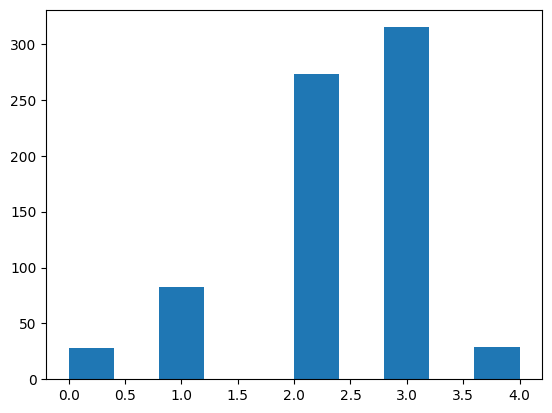

In [96]:
plt.hist(df_FinalScore['FinalScore'],bins=10)

## Save Data

In [97]:
Label_Scores = {}
Label_Scores['companyData'] = company
Label_Scores['finalScore'] = df_FinalScore
Label_Scores['cashScore'] = df_cashScore
Label_Scores['balanceScore'] = df_balanceScore

In [98]:
filepath=os.path.join(PROJ_ROOT_DIR,'pickle','yahoo_label_scores.pkl')
with open(filepath,'wb') as f:
    pickle.dump(Label_Scores,f)

In [99]:
filepath=os.path.join(DATA_ROOT_DIR,'data/export','yahoo_data_labels.csv')
df_FinalScore.to_csv(filepath,index=False)

## Investigate Scores For Individual companies

Use this section to investigate scores for individual companies

## Pepsico

In [69]:
ticker='PEP'
company[ticker]['balanceScore']

{'score': 2,
 'scoreBreakdown': {'stockholdersEquity': 4,
  'retainedEarnings': 4,
  'cashEquivalent': 2,
  'workingCapital': 1,
  'quickRatio': 2,
  'currentRatio': 1,
  'debtCapitalRatio': 3,
  'debtAssetRatio': 4}}

5863000000.0
[1, 2, 3, 4]
[0.9279086366880795, 10.0, 1.5227218653342844, 0.0]
y1_error: 14.52
y2_error: 7.51
y3_error: 0.00
 


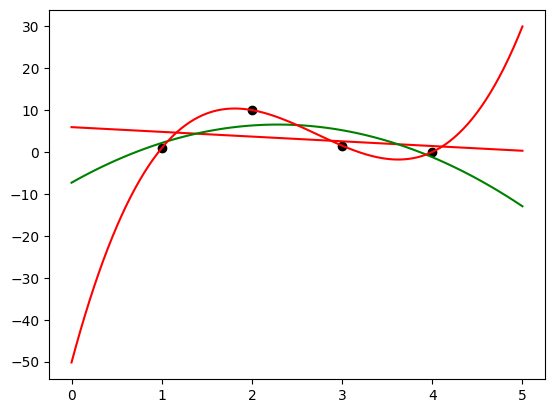

In [70]:
feature='cashEquivalent'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

-3626500000.0
[1, 2, 3, 4]
[4.984615384615385, 10.0, 1.6594871794871802, 0.0]
y1_error: 7.80
y2_error: 5.02
y3_error: 0.00
 


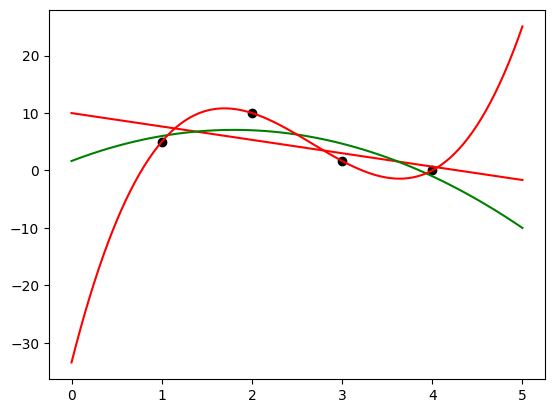

In [71]:
feature='workingCapital'
print(company[ticker]['bal_median'][feature])
trend_details = ext.chk_trend(company[ticker]['balance'][feature])
ext.show_trend(trend_details)

In [77]:
company[ticker]['cashScore']

{'score': 3,
 'scoreBreakdown': {'cashFlowOperatingActivities': 4,
  'freeCashFlow': 3,
  'dividendCover': 1,
  'stockDivBuyBack': 4}}

5662000000.0
[1, 2, 3, 4]
[0.0, 2.3617511520737366, 5.88709677419355, 10.0]
y1_error: 0.20
y2_error: 0.00
y3_error: 0.00
 


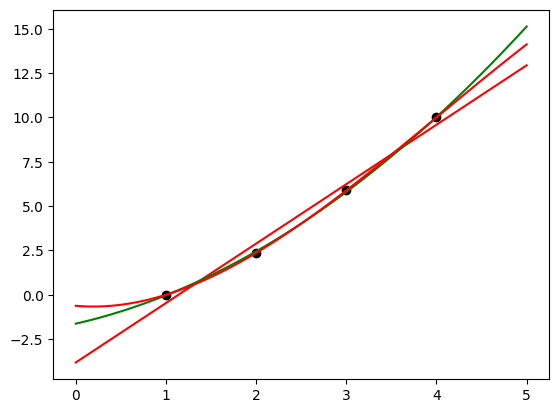

In [79]:
feature='cashDividendsPaid'
print(company[ticker]['cash_median'][feature])
trend_details = ext.chk_trend(company[ticker]['cash'][feature])
ext.show_trend(trend_details)

1750000000.0
[1, 2, 3, 4]
[10.0, 6.5445749827228745, 0.0, 4.816862474084313]
y1_error: 6.89
y2_error: 2.61
y3_error: 0.00
 


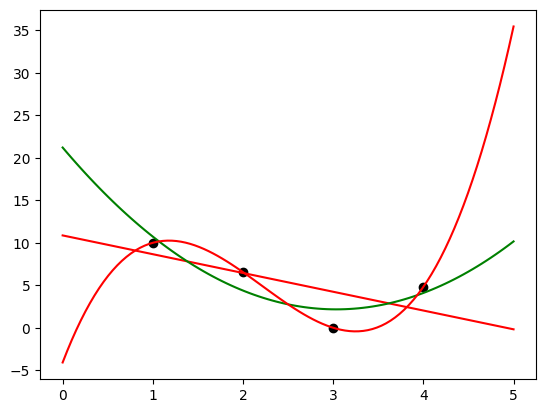

In [80]:
feature='repurchaseOfCapitalStock'
print(company[ticker]['cash_median'][feature])
trend_details = ext.chk_trend(company[ticker]['cash'][feature])
ext.show_trend(trend_details)

5988500000.0
[1, 2, 3, 4]
[0.0, 6.07369758576874, 10.000000000000004, 1.1880559085133457]
y1_error: 15.25
y2_error: 1.40
y3_error: 0.00
 


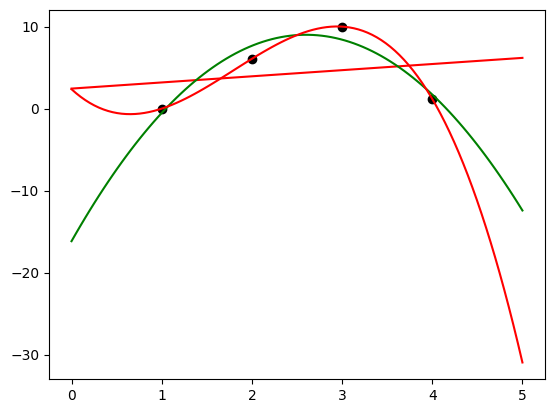

In [87]:
feature='freeCashFlow'
print(company[ticker]['cash_median'][feature])
trend_details = ext.chk_trend(company[ticker]['cash'][feature])
ext.show_trend(trend_details)

In [78]:
company[ticker]['cash_median'].keys()

dict_keys(['industry', 'netIncome', 'netIncomeFromContinuingOperations', 'depreciation', 'stockBasedCompensation', 'cashFlowOperatingActivities', 'capitalExpenditure', 'purchaseOfBusiness', 'netLongTermDebtIssuance', 'netShortTermDebtIssuance', 'commonStockDividendPaid', 'preferredStockDividendPaid', 'cashDividendsPaid', 'netCommonStockIssuance', 'netPreferredStockIssuance', 'repurchaseOfCapitalStock', 'freeCashFlow'])

In [103]:
company[ticker]['incomeScore']

{'score': 3,
 'scoreBreakdown': {'totalRevenue': 4,
  'grossProfit': 4,
  'operatingIncome': 4,
  'netIncome': 3,
  'dilutedEPS': 3}}

In [85]:
transpose_table(company[ticker]['cash'])

Company:  ['PEP']


2019  \
company                                                     PEP   
yahoo_sector                                 Consumer Defensive   
gics_sector                                    Consumer Staples   
industry                                Beverages—Non-Alcoholic   
st_date                                              2019-12-31   
st_YR                                                      2019   
st_Mnth                                                      12   
netIncome                                         7314000000.00   
netIncomeFromContinuingOperations                 7353000000.00   
depreciation                                      2432000000.00   
stockBasedCompensation                             237000000.00   
cashFlowOperatingActivities                       9649000000.00   
capitalExpenditure                               -4232000000.00   
saleOfBusiness                                     253000000.00   
purchaseOfBusiness                               -2717000000.00   
netBusinessPurchaseAndSale                       -2464000000.00   
saleOfPPE                                          170000000.00   
purchaseOfPPE                                              0.00   
netPPEPurchaseAndSale                              170000000.00   
saleOfInvestment                                    97000000.00   
purchaseOfInvestment                                       0.00   
netInvestmentPurchaseAndSale                        97000000.00   
saleOfInvestmentProperties                                 0.00   
purchaseOfInvestmentProperties                             0.00   
netInvestmentPropertiesPurchaseAndSale                     0.00   
saleOfIntangibles                                          0.00   
purchaseOfIntangibles                                      0.00   
netIntangiblesPurchaseAndSale                              0.00   
netOtherInvestingChanges                            -8000000.00   
cashFlowInvestingActivities                      -6437000000.00   
netIssuancePaymentsOfDebt                         -355000000.00   
netLongTermDebtIssuance                           -356000000.00   
netShortTermDebtIssuance                             1000000.00   
commonStockDividendPaid                           5304000000.00   
preferredStockDividendPaid                                -0.00   
cashDividendsPaid                                 5304000000.00   
netCommonStockIssuance                           -3000000000.00   
netPreferredStockIssuance                                  0.00   
repurchaseOfCapitalStock                          3000000000.00   
netOtherFinancingCharges                          -159000000.00   
cashFlowFinancingActivities                      -8489000000.00   
freeCashFlow                                      5417000000.00   

                                                           2020  \
company                                                     PEP   
yahoo_sector                                 Consumer Defensive   
gics_sector                                    Consumer Staples   
industry                                Beverages—Non-Alcoholic   
st_date                                              2020-12-31   
st_YR                                                      2020   
st_Mnth                                                      12   
netIncome                                         7120000000.00   
netIncomeFromContinuingOperations                 7175000000.00   
depreciation                                      2548000000.00   
stockBasedCompensation                             264000000.00   
cashFlowOperatingActivities                      10613000000.00   
capitalExpenditure                               -4240000000.00   
saleOfBusiness                                       4000000.00   
purchaseOfBusiness                               -6372000000.00   
netBusinessPurchaseAndSale                       -6368000000.00   
saleOfPPE                             